# Predicting House Price using Machine Learning Algorithms


## Business Problem

📌 Here we need to predict the selling price of each house. Click on this <a href="https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/overview/description">link</a> to review the data set and variables.

# Import Necessary Libraries

In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
pd.set_option('display.width', 500)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

!pip install catboost
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.exceptions import ConvergenceWarning
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score,GridSearchCV
!pip install missingno
import missingno as msno

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action="ignore", category=ConvergenceWarning)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Import Dataset

In [2]:
train_data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/datasets/housePredict/train.csv")
test_data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/datasets/housePredict/test.csv")
df = train_data.append(test_data, ignore_index=False).reset_index()
df = df.drop("index", axis=1)
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.000,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.000,Gd,TA,PConc,Gd,TA,No,GLQ,706.000,Unf,0.000,150.000,856.000,GasA,Ex,Y,SBrkr,856,854,0,1710,1.000,0.000,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.000,RFn,2.000,548.000,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.000
1,2,20,RL,80.000,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.000,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.000,Unf,0.000,284.000,1262.000,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.000,1.000,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.000,RFn,2.000,460.000,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.000
2,3,60,RL,68.000,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.000,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.000,Unf,0.000,434.000,920.000,GasA,Ex,Y,SBrkr,920,866,0,1786,1.000,0.000,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.000,RFn,2.000,608.000,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.000
3,4,70,RL,60.000,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.000,TA,TA,BrkTil,TA,Gd,No,ALQ,216.000,Unf,0.000,540.000,756.000,GasA,Gd,Y,SBrkr,961,756,0,1717,1.000,0.000,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.000,Unf,3.000,642.000,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.000
4,5,60,RL,84.000,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.000,Gd,TA,PConc,Gd,TA,Av,GLQ,655.000,Unf,0.000,490.000,1145.000,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.000,0.000,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.000,RFn,3.000,836.000,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.000


# General Information About to the Dataset

In [3]:
def check_df(dataframe,head=5):
  print("######################### Head #########################")
  print(dataframe.head(head))
  print("######################### Tail #########################")
  print(dataframe.tail(head))
  print("######################### Shape #########################")
  print(dataframe.shape)
  print("######################### Types #########################")
  print(dataframe.dtypes)
  print("######################### NA #########################")
  print(dataframe.isnull().sum())
  print("######################### Qurtiles #########################")
  print(dataframe.describe([0, 0.05, 0.50, 0.95, 0.99, 1]).T)

In [4]:
check_df(df)

######################### Head #########################
   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape LandContour Utilities LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0   1          60       RL       65.000     8450   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam     2Story            7            5       2003          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace     196.000        Gd        TA      PConc       Gd       TA           No          GLQ     706.000          Unf       0.000    150.000      856.000    GasA        Ex       

# Analysis of Categorical and Numerical Variables

In [5]:
def grab_col_names(dataframe, cat_th=10, car_th=20):
  #Catgeorical Variable Selection
  cat_cols = [col for col in dataframe.columns if str(dataframe[col].dtypes) in ["category","object","bool"]]
  num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and dataframe[col].dtypes in ["uint8","int64","float64"]]
  cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and str(dataframe[col].dtypes) in ["category","object"]]
  cat_cols = cat_cols + num_but_cat
  cat_cols = [col for col in cat_cols if col not in cat_but_car]

  #Numerical Variable Selection
  num_cols = [col for col in dataframe.columns if dataframe[col].dtypes in ["uint8","int64","float64"]]
  num_cols = [col for col in num_cols if col not in cat_cols]

  return cat_cols, num_cols, cat_but_car, num_but_cat

In [6]:
cat_cols, num_cols, cat_but_car, num_but_cat = grab_col_names(df)

#Print Categorical and Numerical Variables
print(f"Observations: {df.shape[0]}")
print(f"Variables: {df.shape[1]}")
print(f"Cat_cols: {len(cat_cols)}")
print(f"Num_cols: {len(num_cols)}")
print(f"Cat_but_car: {len(cat_but_car)}")
print(f"num_but_cat: {len(num_but_cat)}")

Observations: 2919
Variables: 81
Cat_cols: 52
Num_cols: 28
Cat_but_car: 1
num_but_cat: 10


In [7]:
def cat_summary(dataframe,col_name,plot=False):
  print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                      'Ration': 100 * dataframe[col_name].value_counts() / len(dataframe)}))
  print("##########################################")
  if plot:
    sns.countplot(x=dataframe[col_name],data=dataframe)
    plt.show(block=True)

In [8]:
def cat_summary_df(dataframe):
  cat_cols, num_cols, cat_but_car, num_but_cat = grab_col_names(df)
  for col in cat_cols:
    cat_summary(dataframe, col, plot=True)

         MSZoning  Ration
RL           2265  77.595
RM            460  15.759
FV            139   4.762
RH             26   0.891
C (all)        25   0.856
##########################################


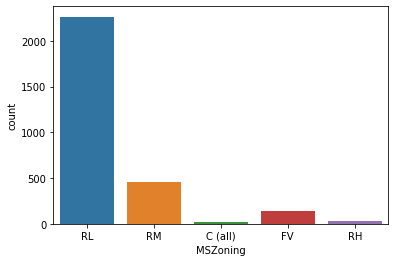

      Street  Ration
Pave    2907  99.589
Grvl      12   0.411
##########################################


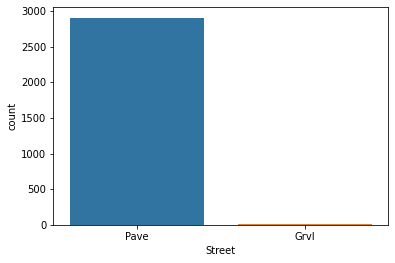

      Alley  Ration
Grvl    120   4.111
Pave     78   2.672
##########################################


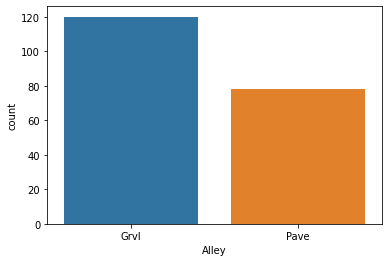

     LotShape  Ration
Reg      1859  63.686
IR1       968  33.162
IR2        76   2.604
IR3        16   0.548
##########################################


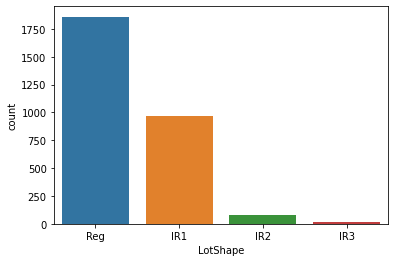

     LandContour  Ration
Lvl         2622  89.825
HLS          120   4.111
Bnk          117   4.008
Low           60   2.055
##########################################


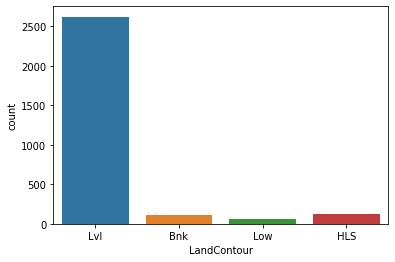

        Utilities  Ration
AllPub       2916  99.897
NoSeWa          1   0.034
##########################################


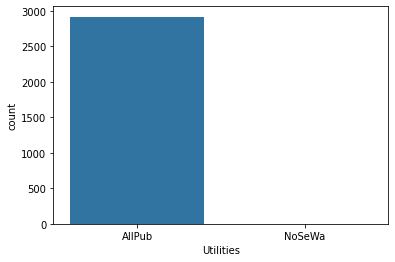

         LotConfig  Ration
Inside        2133  73.073
Corner         511  17.506
CulDSac        176   6.029
FR2             85   2.912
FR3             14   0.480
##########################################


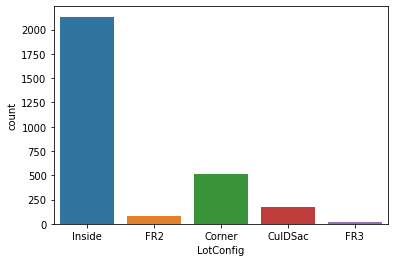

     LandSlope  Ration
Gtl       2778  95.170
Mod        125   4.282
Sev         16   0.548
##########################################


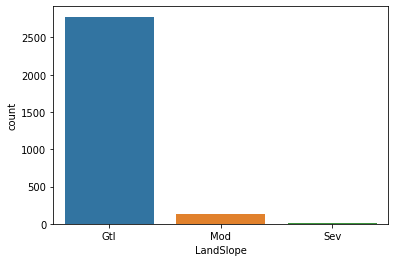

        Condition1  Ration
Norm          2511  86.023
Feedr          164   5.618
Artery          92   3.152
RRAn            50   1.713
PosN            39   1.336
RRAe            28   0.959
PosA            20   0.685
RRNn             9   0.308
RRNe             6   0.206
##########################################


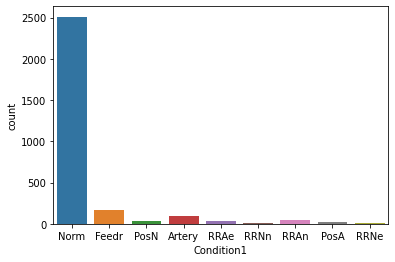

        Condition2  Ration
Norm          2889  98.972
Feedr           13   0.445
Artery           5   0.171
PosN             4   0.137
PosA             4   0.137
RRNn             2   0.069
RRAn             1   0.034
RRAe             1   0.034
##########################################


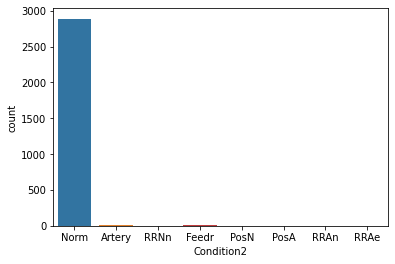

        BldgType  Ration
1Fam        2425  83.076
TwnhsE       227   7.777
Duplex       109   3.734
Twnhs         96   3.289
2fmCon        62   2.124
##########################################


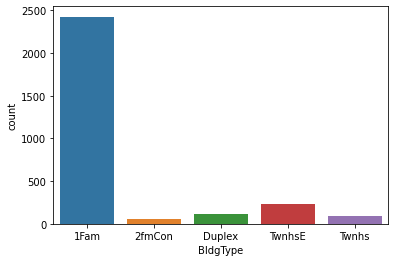

        HouseStyle  Ration
1Story        1471  50.394
2Story         872  29.873
1.5Fin         314  10.757
SLvl           128   4.385
SFoyer          83   2.843
2.5Unf          24   0.822
1.5Unf          19   0.651
2.5Fin           8   0.274
##########################################


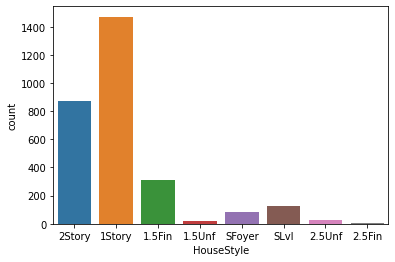

         RoofStyle  Ration
Gable         2310  79.137
Hip            551  18.876
Gambrel         22   0.754
Flat            20   0.685
Mansard         11   0.377
Shed             5   0.171
##########################################


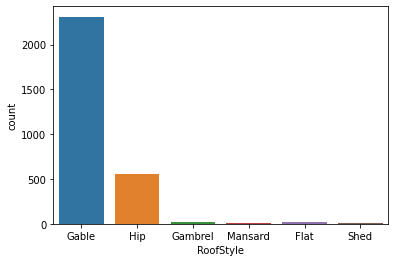

         RoofMatl  Ration
CompShg      2876  98.527
Tar&Grv        23   0.788
WdShake         9   0.308
WdShngl         7   0.240
Metal           1   0.034
Membran         1   0.034
Roll            1   0.034
ClyTile         1   0.034
##########################################


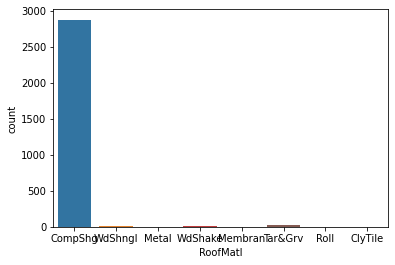

         Exterior1st  Ration
VinylSd         1025  35.115
MetalSd          450  15.416
HdBoard          442  15.142
Wd Sdng          411  14.080
Plywood          221   7.571
CemntBd          126   4.317
BrkFace           87   2.980
WdShing           56   1.918
AsbShng           44   1.507
Stucco            43   1.473
BrkComm            6   0.206
AsphShn            2   0.069
Stone              2   0.069
CBlock             2   0.069
ImStucc            1   0.034
##########################################


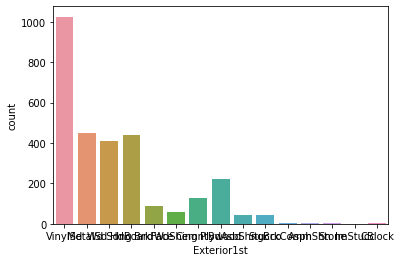

         Exterior2nd  Ration
VinylSd         1014  34.738
MetalSd          447  15.313
HdBoard          406  13.909
Wd Sdng          391  13.395
Plywood          270   9.250
CmentBd          126   4.317
Wd Shng           81   2.775
BrkFace           47   1.610
Stucco            47   1.610
AsbShng           38   1.302
Brk Cmn           22   0.754
ImStucc           15   0.514
Stone              6   0.206
AsphShn            4   0.137
CBlock             3   0.103
Other              1   0.034
##########################################


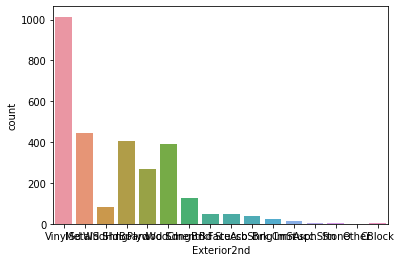

         MasVnrType  Ration
None           1742  59.678
BrkFace         879  30.113
Stone           249   8.530
BrkCmn           25   0.856
##########################################


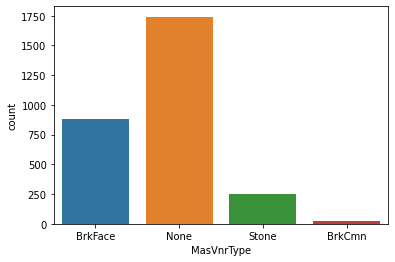

    ExterQual  Ration
TA       1798  61.596
Gd        979  33.539
Ex        107   3.666
Fa         35   1.199
##########################################


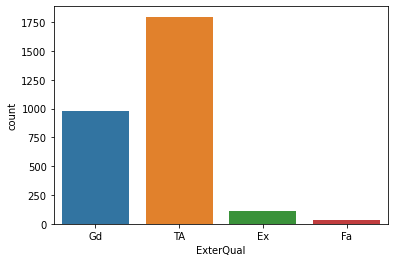

    ExterCond  Ration
TA       2538  86.948
Gd        299  10.243
Fa         67   2.295
Ex         12   0.411
Po          3   0.103
##########################################


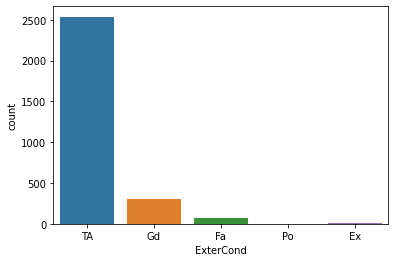

        Foundation  Ration
PConc         1308  44.810
CBlock        1235  42.309
BrkTil         311  10.654
Slab            49   1.679
Stone           11   0.377
Wood             5   0.171
##########################################


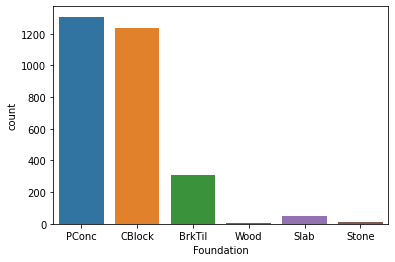

    BsmtQual  Ration
TA      1283  43.953
Gd      1209  41.418
Ex       258   8.839
Fa        88   3.015
##########################################


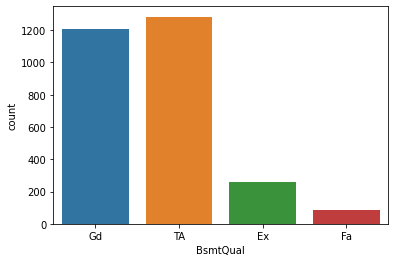

    BsmtCond  Ration
TA      2606  89.277
Gd       122   4.180
Fa       104   3.563
Po         5   0.171
##########################################


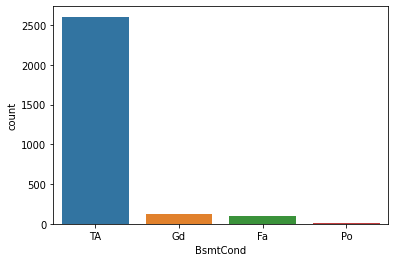

    BsmtExposure  Ration
No          1904  65.228
Av           418  14.320
Gd           276   9.455
Mn           239   8.188
##########################################


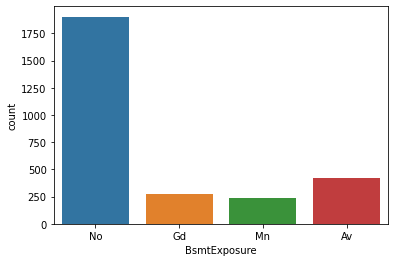

     BsmtFinType1  Ration
Unf           851  29.154
GLQ           849  29.085
ALQ           429  14.697
Rec           288   9.866
BLQ           269   9.215
LwQ           154   5.276
##########################################


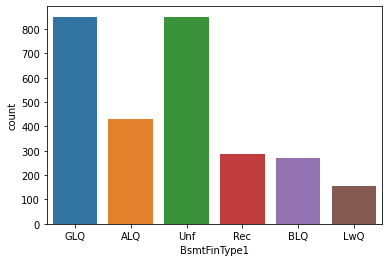

     BsmtFinType2  Ration
Unf          2493  85.406
Rec           105   3.597
LwQ            87   2.980
BLQ            68   2.330
ALQ            52   1.781
GLQ            34   1.165
##########################################


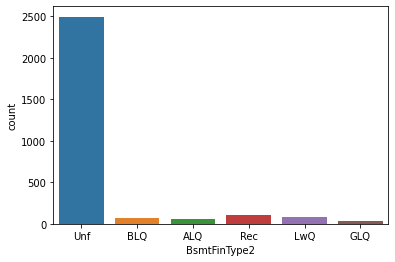

       Heating  Ration
GasA      2874  98.458
GasW        27   0.925
Grav         9   0.308
Wall         6   0.206
OthW         2   0.069
Floor        1   0.034
##########################################


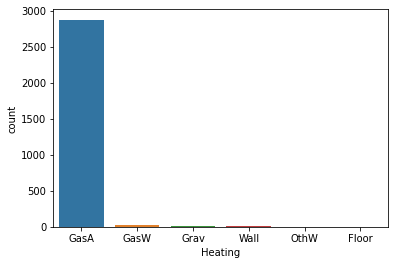

    HeatingQC  Ration
Ex       1493  51.148
TA        857  29.359
Gd        474  16.238
Fa         92   3.152
Po          3   0.103
##########################################


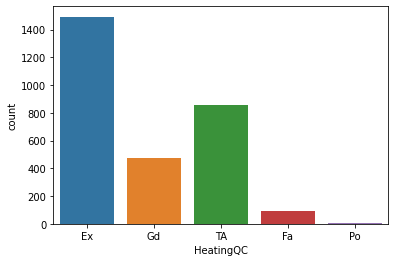

   CentralAir  Ration
Y        2723  93.285
N         196   6.715
##########################################


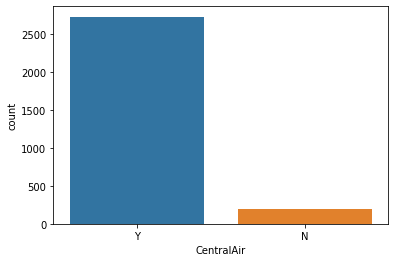

       Electrical  Ration
SBrkr        2671  91.504
FuseA         188   6.441
FuseF          50   1.713
FuseP           8   0.274
Mix             1   0.034
##########################################


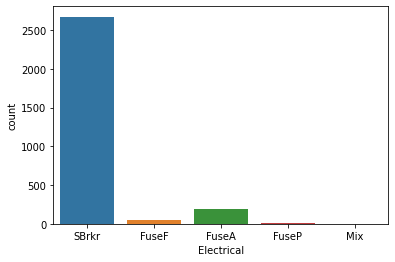

    KitchenQual  Ration
TA         1492  51.113
Gd         1151  39.431
Ex          205   7.023
Fa           70   2.398
##########################################


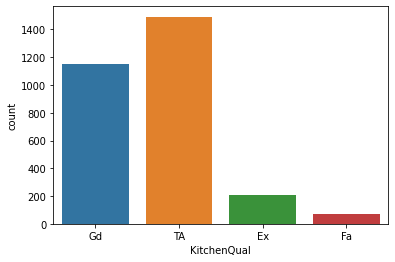

      Functional  Ration
Typ         2717  93.080
Min2          70   2.398
Min1          65   2.227
Mod           35   1.199
Maj1          19   0.651
Maj2           9   0.308
Sev            2   0.069
##########################################


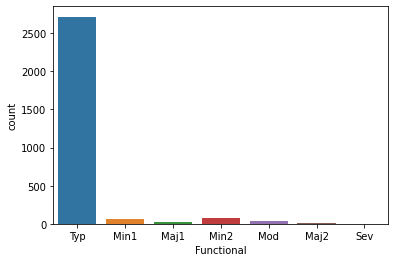

    FireplaceQu  Ration
Gd          744  25.488
TA          592  20.281
Fa           74   2.535
Po           46   1.576
Ex           43   1.473
##########################################


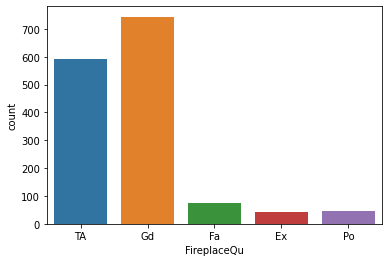

         GarageType  Ration
Attchd         1723  59.027
Detchd          779  26.687
BuiltIn         186   6.372
Basment          36   1.233
2Types           23   0.788
CarPort          15   0.514
##########################################


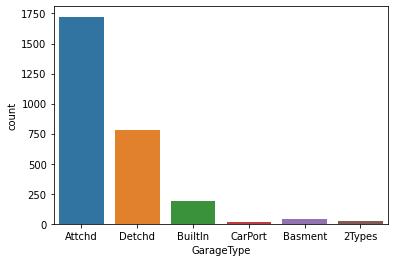

     GarageFinish  Ration
Unf          1230  42.138
RFn           811  27.783
Fin           719  24.632
##########################################


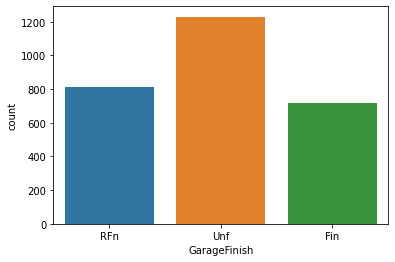

    GarageQual  Ration
TA        2604  89.209
Fa         124   4.248
Gd          24   0.822
Po           5   0.171
Ex           3   0.103
##########################################


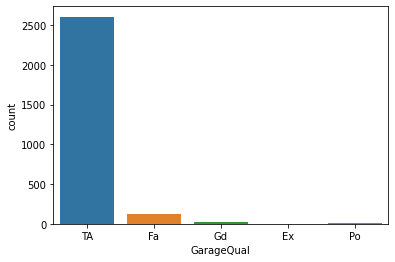

    GarageCond  Ration
TA        2654  90.922
Fa          74   2.535
Gd          15   0.514
Po          14   0.480
Ex           3   0.103
##########################################


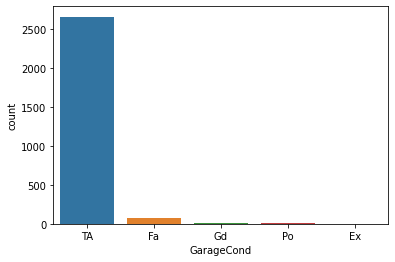

   PavedDrive  Ration
Y        2641  90.476
N         216   7.400
P          62   2.124
##########################################


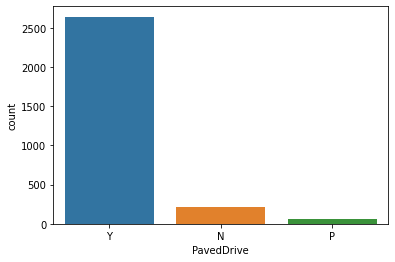

    PoolQC  Ration
Ex       4   0.137
Gd       4   0.137
Fa       2   0.069
##########################################


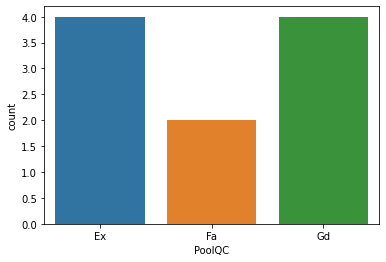

       Fence  Ration
MnPrv    329  11.271
GdPrv    118   4.042
GdWo     112   3.837
MnWw      12   0.411
##########################################


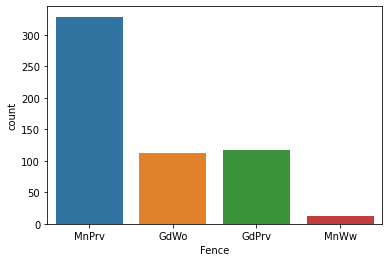

      MiscFeature  Ration
Shed           95   3.255
Gar2            5   0.171
Othr            4   0.137
TenC            1   0.034
##########################################


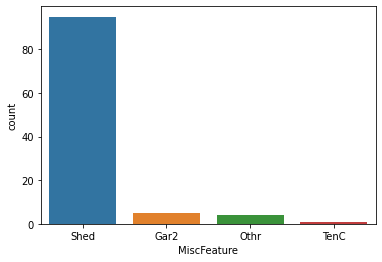

       SaleType  Ration
WD         2525  86.502
New         239   8.188
COD          87   2.980
ConLD        26   0.891
CWD          12   0.411
ConLI         9   0.308
ConLw         8   0.274
Oth           7   0.240
Con           5   0.171
##########################################


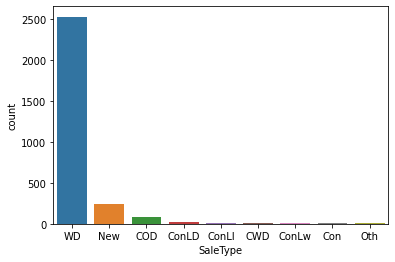

         SaleCondition  Ration
Normal            2402  82.288
Partial            245   8.393
Abnorml            190   6.509
Family              46   1.576
Alloca              24   0.822
AdjLand             12   0.411
##########################################


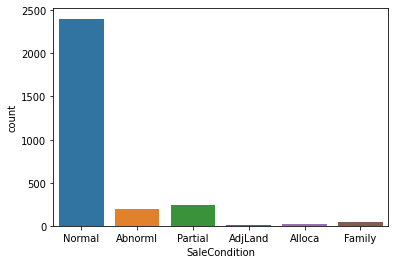

   OverallCond  Ration
5         1645  56.355
6          531  18.191
7          390  13.361
8          144   4.933
4          101   3.460
3           50   1.713
9           41   1.405
2           10   0.343
1            7   0.240
##########################################


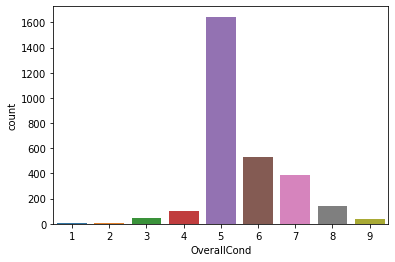

       BsmtFullBath  Ration
0.000          1705  58.410
1.000          1172  40.151
2.000            38   1.302
3.000             2   0.069
##########################################


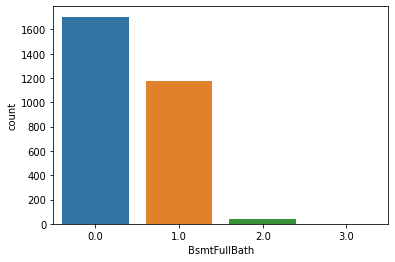

       BsmtHalfBath  Ration
0.000          2742  93.936
1.000           171   5.858
2.000             4   0.137
##########################################


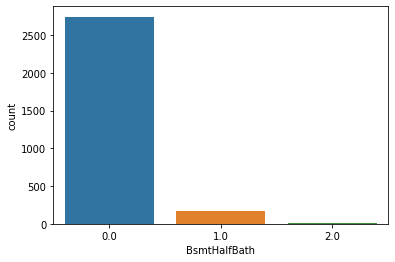

   FullBath  Ration
2      1530  52.415
1      1309  44.844
3        64   2.193
0        12   0.411
4         4   0.137
##########################################


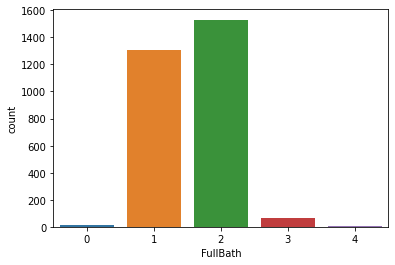

   HalfBath  Ration
0      1834  62.830
1      1060  36.314
2        25   0.856
##########################################


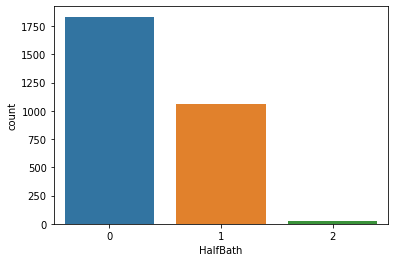

   BedroomAbvGr  Ration
3          1596  54.676
2           742  25.420
4           400  13.703
1           103   3.529
5            48   1.644
6            21   0.719
0             8   0.274
8             1   0.034
##########################################


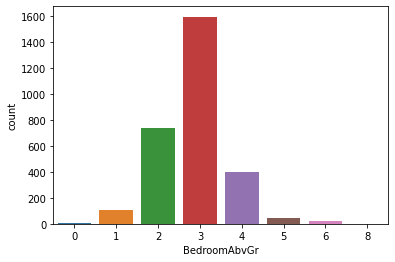

   KitchenAbvGr  Ration
1          2785  95.409
2           129   4.419
0             3   0.103
3             2   0.069
##########################################


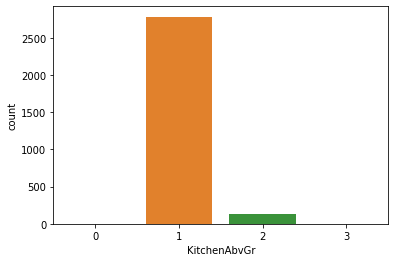

   Fireplaces  Ration
0        1420  48.647
1        1268  43.440
2         219   7.503
3          11   0.377
4           1   0.034
##########################################


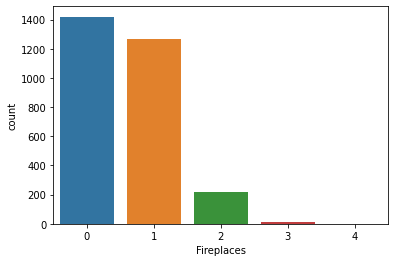

       GarageCars  Ration
2.000        1594  54.608
1.000         776  26.584
3.000         374  12.813
0.000         157   5.379
4.000          16   0.548
5.000           1   0.034
##########################################


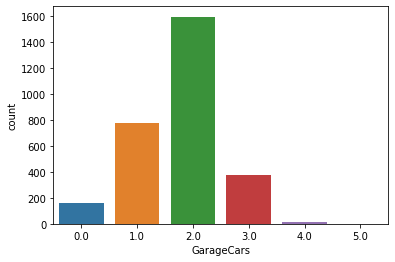

      YrSold  Ration
2007     692  23.707
2009     647  22.165
2008     622  21.309
2006     619  21.206
2010     339  11.614
##########################################


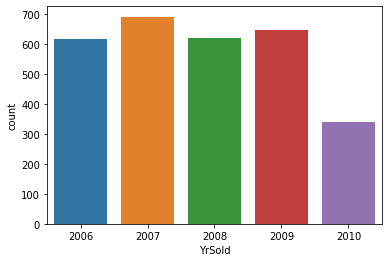

In [9]:
cat_summary_df(df)

In [10]:
def num_summary(dataframe, num_col, plot=False):
  quantiles = [0.01, 0.05, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 0.95, 0.99]
  print(dataframe[num_col].describe(quantiles).T)

  if plot:
    dataframe[num_col].hist(bins=20)
    plt.xlabel(num_col)
    plt.title(num_col)
    plt.show(block=True)

In [11]:
def num_summary_df(dataframe):
  cat_cols, num_cols, cat_but_car, num_but_cat = grab_col_names(df)
  for col in num_cols:
    num_summary(dataframe, col, plot=True)

count   2919.000
mean    1460.000
std      842.787
min        1.000
1%        30.180
5%       146.900
10%      292.800
20%      584.600
30%      876.400
40%     1168.200
50%     1460.000
60%     1751.800
70%     2043.600
80%     2335.400
90%     2627.200
95%     2773.100
99%     2889.820
max     2919.000
Name: Id, dtype: float64


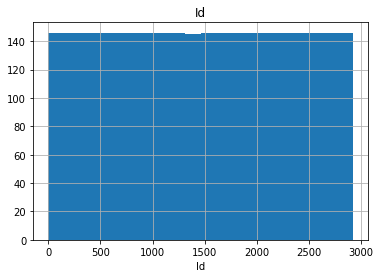

count   2919.000
mean      57.138
std       42.518
min       20.000
1%        20.000
5%        20.000
10%       20.000
20%       20.000
30%       20.000
40%       30.000
50%       50.000
60%       60.000
70%       60.000
80%       80.000
90%      120.000
95%      160.000
99%      190.000
max      190.000
Name: MSSubClass, dtype: float64


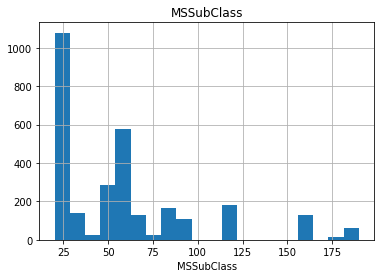

count   2433.000
mean      69.306
std       23.345
min       21.000
1%        21.000
5%        32.000
10%       43.000
20%       53.000
30%       60.000
40%       63.000
50%       68.000
60%       73.000
70%       78.000
80%       84.000
90%       95.000
95%      107.000
99%      135.680
max      313.000
Name: LotFrontage, dtype: float64


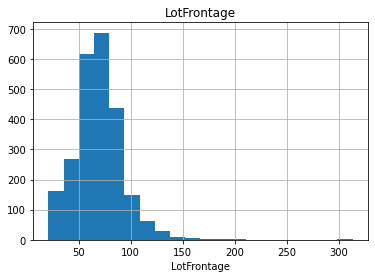

count     2919.000
mean     10168.114
std       7886.996
min       1300.000
1%        1680.000
5%        3182.000
10%       4922.400
20%       7007.600
30%       7960.400
40%       8741.000
50%       9453.000
60%      10151.600
70%      11001.200
80%      12203.800
90%      14300.600
95%      17142.900
99%      33038.640
max     215245.000
Name: LotArea, dtype: float64


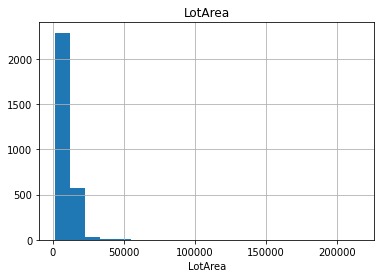

count   2919.000
mean       6.089
std        1.410
min        1.000
1%         3.000
5%         4.000
10%        5.000
20%        5.000
30%        5.000
40%        6.000
50%        6.000
60%        6.000
70%        7.000
80%        7.000
90%        8.000
95%        8.000
99%       10.000
max       10.000
Name: OverallQual, dtype: float64


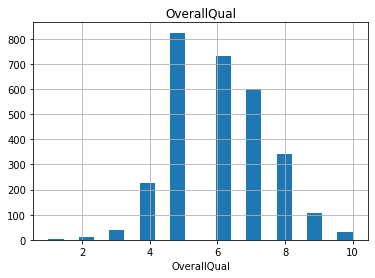

count   2919.000
mean    1971.313
std       30.291
min     1872.000
1%      1900.000
5%      1915.000
10%     1924.000
20%     1947.000
30%     1957.000
40%     1965.000
50%     1973.000
60%     1984.000
70%     1998.000
80%     2003.000
90%     2006.000
95%     2007.000
99%     2008.000
max     2010.000
Name: YearBuilt, dtype: float64


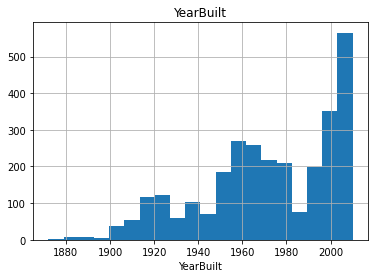

count   2919.000
mean    1984.264
std       20.894
min     1950.000
1%      1950.000
5%      1950.000
10%     1950.000
20%     1960.000
30%     1970.000
40%     1978.000
50%     1993.000
60%     1998.000
70%     2002.000
80%     2005.000
90%     2006.200
95%     2007.000
99%     2009.000
max     2010.000
Name: YearRemodAdd, dtype: float64


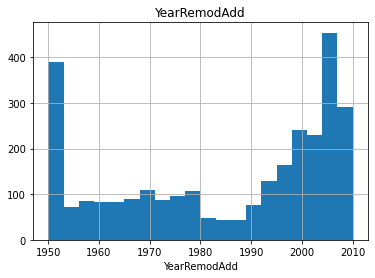

count   2896.000
mean     102.201
std      179.334
min        0.000
1%         0.000
5%         0.000
10%        0.000
20%        0.000
30%        0.000
40%        0.000
50%        0.000
60%        0.000
70%      120.000
80%      202.000
90%      325.500
95%      466.500
99%      771.050
max     1600.000
Name: MasVnrArea, dtype: float64


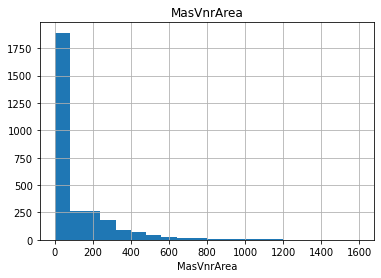

count   2918.000
mean     441.423
std      455.611
min        0.000
1%         0.000
5%         0.000
10%        0.000
20%        0.000
30%        0.000
40%      202.600
50%      368.500
60%      515.200
70%      656.000
80%      812.000
90%     1056.900
95%     1274.000
99%     1635.320
max     5644.000
Name: BsmtFinSF1, dtype: float64


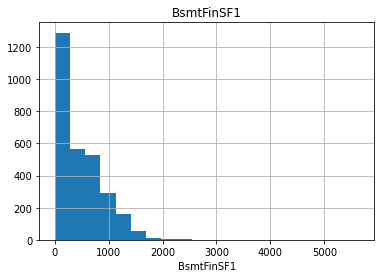

count   2918.000
mean      49.582
std      169.206
min        0.000
1%         0.000
5%         0.000
10%        0.000
20%        0.000
30%        0.000
40%        0.000
50%        0.000
60%        0.000
70%        0.000
80%        0.000
90%      125.600
95%      435.000
99%      874.660
max     1526.000
Name: BsmtFinSF2, dtype: float64


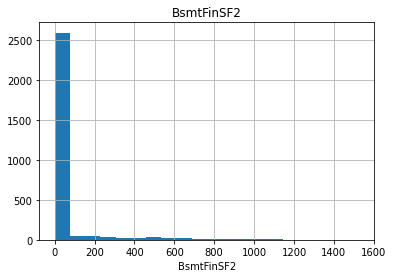

count   2918.000
mean     560.772
std      439.544
min        0.000
1%         0.000
5%         0.000
10%       56.000
20%      174.000
30%      270.000
40%      365.800
50%      467.000
60%      595.000
70%      732.000
80%      892.600
90%     1212.600
95%     1474.900
99%     1776.490
max     2336.000
Name: BsmtUnfSF, dtype: float64


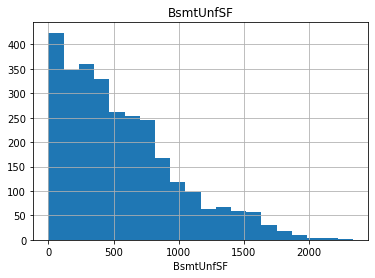

count   2918.000
mean    1051.778
std      440.766
min        0.000
1%         0.000
5%       455.250
10%      600.000
20%      741.000
30%      836.000
40%      911.000
50%      989.500
60%     1089.200
70%     1216.000
80%     1392.000
90%     1614.000
95%     1776.150
99%     2198.300
max     6110.000
Name: TotalBsmtSF, dtype: float64


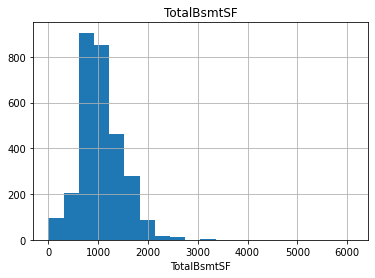

count   2919.000
mean    1159.582
std      392.362
min      334.000
1%       520.000
5%       665.900
10%      744.800
20%      847.000
30%      914.000
40%      996.200
50%     1082.000
60%     1180.000
70%     1314.000
80%     1483.400
90%     1675.000
95%     1830.100
99%     2288.020
max     5095.000
Name: 1stFlrSF, dtype: float64


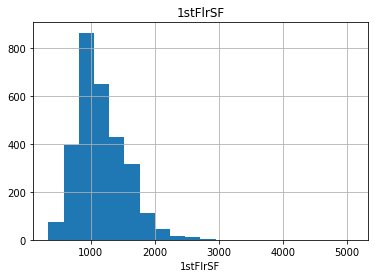

count   2919.000
mean     336.484
std      428.701
min        0.000
1%         0.000
5%         0.000
10%        0.000
20%        0.000
30%        0.000
40%        0.000
50%        0.000
60%      427.400
70%      636.000
80%      770.800
90%      925.000
95%     1131.200
99%     1400.200
max     2065.000
Name: 2ndFlrSF, dtype: float64


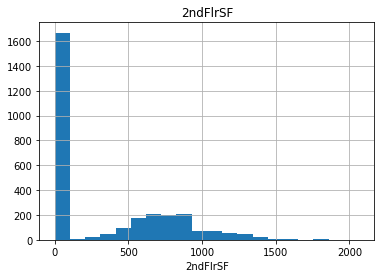

count   2919.000
mean       4.694
std       46.397
min        0.000
1%         0.000
5%         0.000
10%        0.000
20%        0.000
30%        0.000
40%        0.000
50%        0.000
60%        0.000
70%        0.000
80%        0.000
90%        0.000
95%        0.000
99%      153.840
max     1064.000
Name: LowQualFinSF, dtype: float64


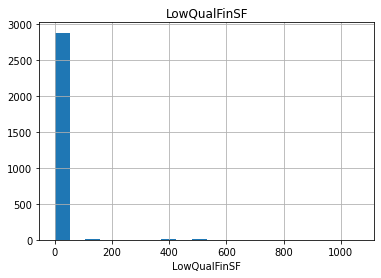

count   2919.000
mean    1500.760
std      506.051
min      334.000
1%       675.420
5%       861.000
10%      923.800
20%     1064.600
30%     1200.000
40%     1329.200
50%     1444.000
60%     1560.000
70%     1680.000
80%     1838.400
90%     2153.200
95%     2464.200
99%     2935.720
max     5642.000
Name: GrLivArea, dtype: float64


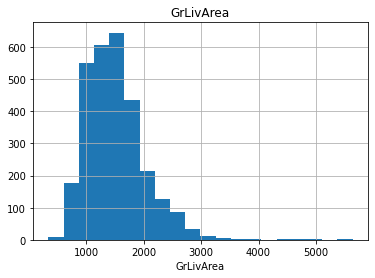

count   2919.000
mean       6.452
std        1.569
min        2.000
1%         4.000
5%         4.000
10%        5.000
20%        5.000
30%        6.000
40%        6.000
50%        6.000
60%        7.000
70%        7.000
80%        8.000
90%        8.000
95%        9.000
99%       11.000
max       15.000
Name: TotRmsAbvGrd, dtype: float64


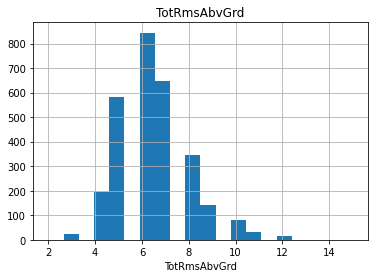

count   2760.000
mean    1978.113
std       25.574
min     1895.000
1%      1915.000
5%      1928.000
10%     1941.000
20%     1957.000
30%     1964.000
40%     1972.000
50%     1979.000
60%     1993.000
70%     1999.000
80%     2004.000
90%     2006.000
95%     2007.000
99%     2009.000
max     2207.000
Name: GarageYrBlt, dtype: float64


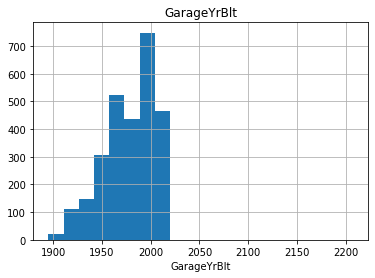

count   2918.000
mean     472.875
std      215.395
min        0.000
1%         0.000
5%         0.000
10%      240.000
20%      296.000
30%      379.000
40%      440.000
50%      480.000
60%      513.000
70%      560.900
80%      621.000
90%      758.000
95%      856.150
99%     1019.490
max     1488.000
Name: GarageArea, dtype: float64


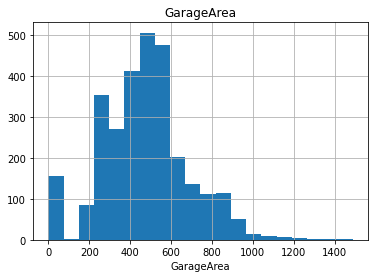

count   2919.000
mean      93.710
std      126.527
min        0.000
1%         0.000
5%         0.000
10%        0.000
20%        0.000
30%        0.000
40%        0.000
50%        0.000
60%      100.000
70%      144.000
80%      192.000
90%      257.000
95%      328.000
99%      500.820
max     1424.000
Name: WoodDeckSF, dtype: float64


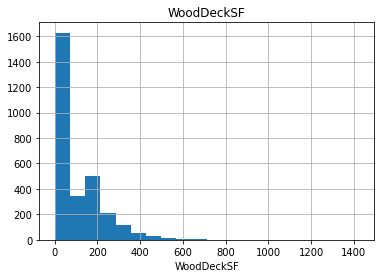

count   2919.000
mean      47.487
std       67.575
min        0.000
1%         0.000
5%         0.000
10%        0.000
20%        0.000
30%        0.000
40%        0.000
50%       26.000
60%       40.000
70%       58.000
80%       85.000
90%      131.200
95%      183.100
99%      284.460
max      742.000
Name: OpenPorchSF, dtype: float64


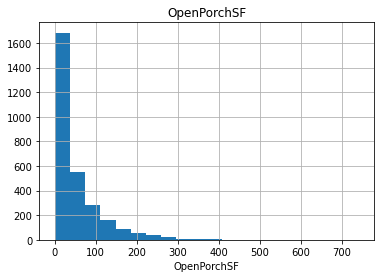

count   2919.000
mean      23.098
std       64.244
min        0.000
1%         0.000
5%         0.000
10%        0.000
20%        0.000
30%        0.000
40%        0.000
50%        0.000
60%        0.000
70%        0.000
80%        0.000
90%      112.000
95%      176.000
99%      264.000
max     1012.000
Name: EnclosedPorch, dtype: float64


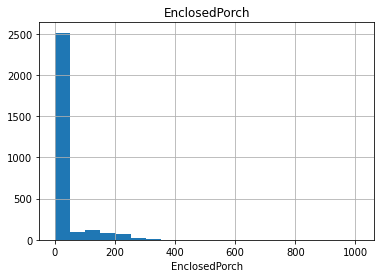

count   2919.000
mean       2.602
std       25.188
min        0.000
1%         0.000
5%         0.000
10%        0.000
20%        0.000
30%        0.000
40%        0.000
50%        0.000
60%        0.000
70%        0.000
80%        0.000
90%        0.000
95%        0.000
99%      144.000
max      508.000
Name: 3SsnPorch, dtype: float64


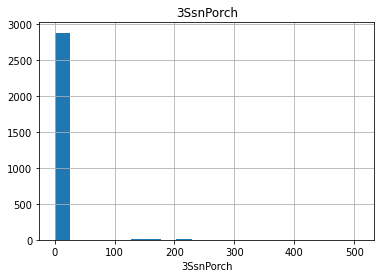

count   2919.000
mean      16.062
std       56.184
min        0.000
1%         0.000
5%         0.000
10%        0.000
20%        0.000
30%        0.000
40%        0.000
50%        0.000
60%        0.000
70%        0.000
80%        0.000
90%        0.000
95%      161.000
99%      259.820
max      576.000
Name: ScreenPorch, dtype: float64


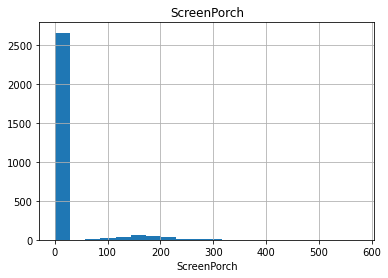

count   2919.000
mean       2.252
std       35.664
min        0.000
1%         0.000
5%         0.000
10%        0.000
20%        0.000
30%        0.000
40%        0.000
50%        0.000
60%        0.000
70%        0.000
80%        0.000
90%        0.000
95%        0.000
99%        0.000
max      800.000
Name: PoolArea, dtype: float64


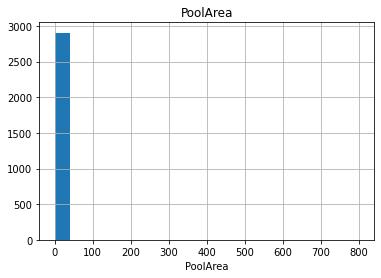

count    2919.000
mean       50.826
std       567.402
min         0.000
1%          0.000
5%          0.000
10%         0.000
20%         0.000
30%         0.000
40%         0.000
50%         0.000
60%         0.000
70%         0.000
80%         0.000
90%         0.000
95%         0.000
99%       982.000
max     17000.000
Name: MiscVal, dtype: float64


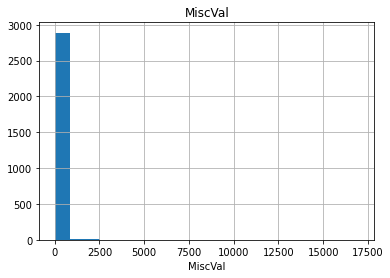

count   2919.000
mean       6.213
std        2.715
min        1.000
1%         1.000
5%         2.000
10%        3.000
20%        4.000
30%        5.000
40%        6.000
50%        6.000
60%        7.000
70%        7.000
80%        8.000
90%       10.000
95%       11.000
99%       12.000
max       12.000
Name: MoSold, dtype: float64


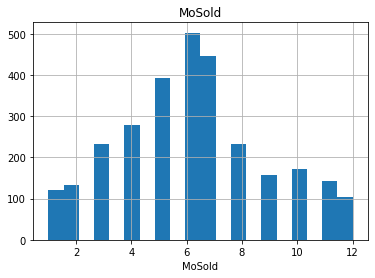

count     1460.000
mean    180921.196
std      79442.503
min      34900.000
1%       61815.970
5%       88000.000
10%     106475.000
20%     124000.000
30%     135500.000
40%     147000.000
50%     163000.000
60%     179280.000
70%     198620.000
80%     230000.000
90%     278000.000
95%     326100.000
99%     442567.010
max     755000.000
Name: SalePrice, dtype: float64


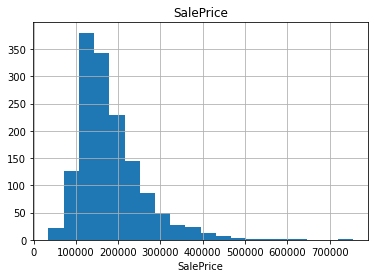

In [12]:
num_summary_df(df)

In [13]:
def plot_num_summary(dataframe):
  cat_cols, num_cols, cat_but_car, num_but_cat = grab_col_names(dataframe)
  plt.figure(figsize=(20,16))
  for index, col in enumerate(num_cols):
    plt.subplot(7,4,index+1)
    plt.tight_layout()
    dataframe[col].hist(bins=20)
    plt.title(col)

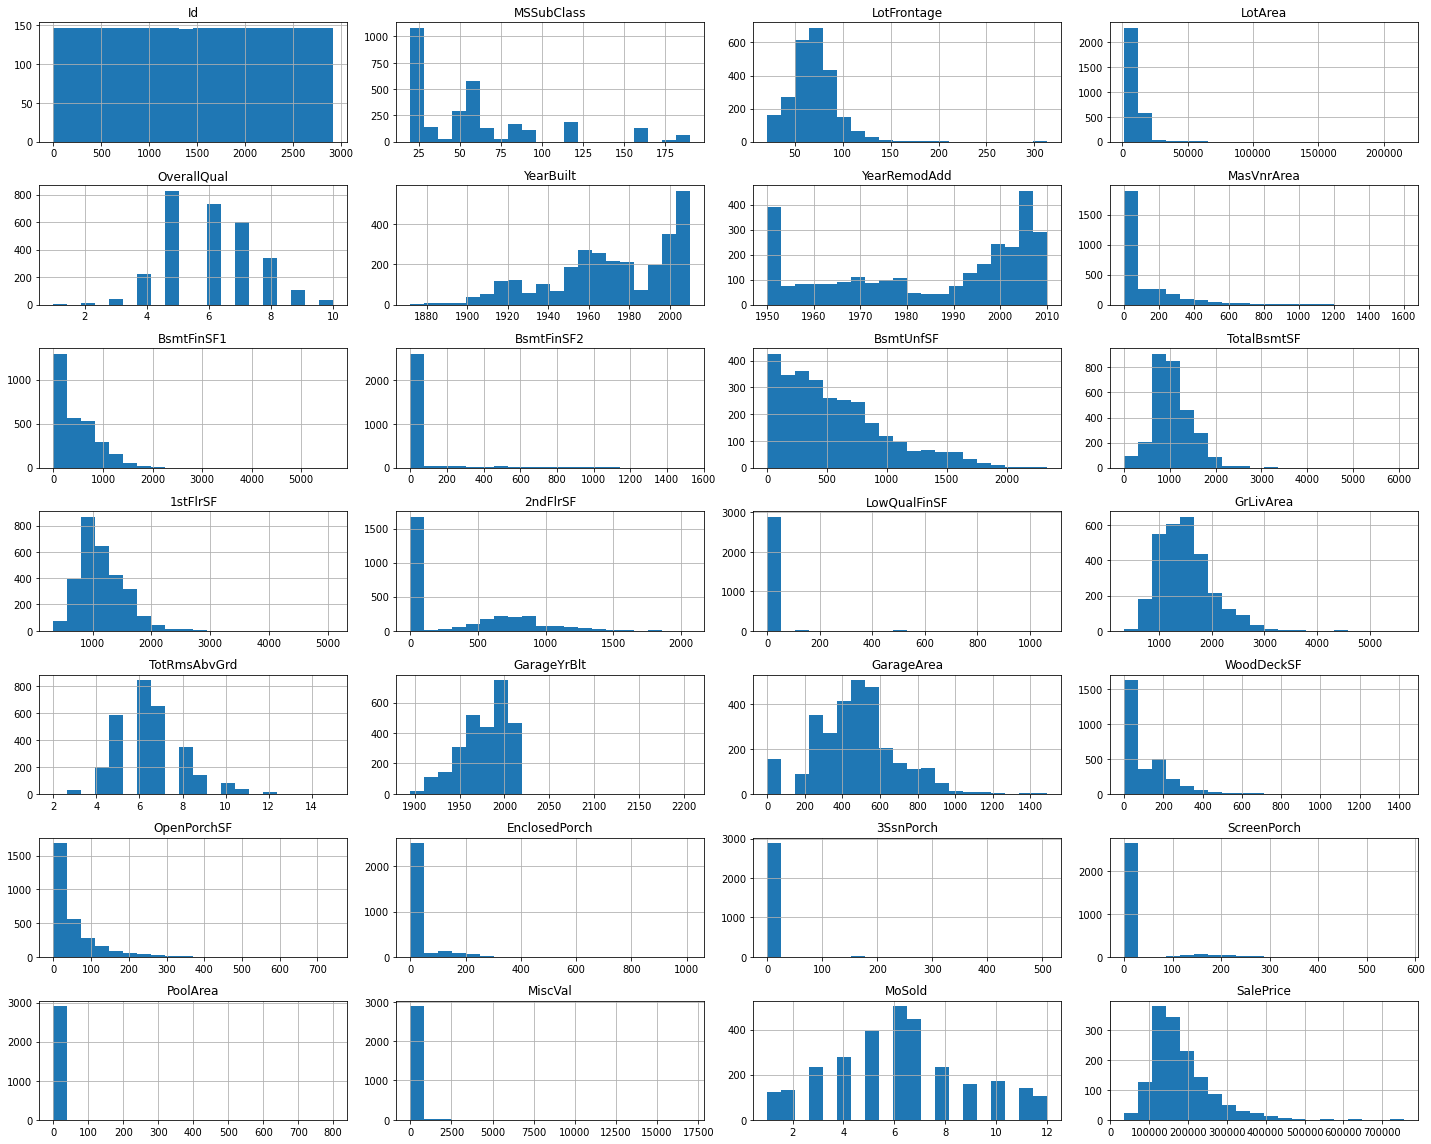

In [14]:
plot_num_summary(df)

In [15]:
def target_summary_with_cat(dataframe, target, categorical_col):
  print(pd.DataFrame({"Target Mean": dataframe.groupby(categorical_col)[target].mean()}))
  print("#############################################")

In [16]:
def target_summary_with_cat_df(dataframe, target):
  cat_cols, num_cols, cat_but_car, num_but_cat = grab_col_names(df)
  for col in cat_cols:
    target_summary_with_cat(dataframe, target, col)

In [17]:
target_summary_with_cat_df(df, "SalePrice")

          Target Mean
MSZoning             
C (all)     74528.000
FV         214014.062
RH         131558.375
RL         191004.995
RM         126316.830
#############################################
        Target Mean
Street             
Grvl     130190.500
Pave     181130.539
#############################################
       Target Mean
Alley             
Grvl    122219.080
Pave    168000.585
#############################################
          Target Mean
LotShape             
IR1        206101.665
IR2        239833.366
IR3        216036.500
Reg        164754.818
#############################################
             Target Mean
LandContour             
Bnk           143104.079
HLS           231533.940
Low           203661.111
Lvl           180183.747
#############################################
           Target Mean
Utilities             
AllPub      180950.957
NoSeWa      137500.000
#############################################
           Target Mean
LotConfig        

# Examination of the dependent variable


In [18]:
def exam_dependent_variable(dataframe, target):
  plt.figure(figsize=(16,4))
  plt.subplot(121)
  dataframe[target].hist(bins=100)
  plt.title(target + ", Histogram")
  plt.subplot(122)
  np.log1p(dataframe[target]).hist(bins=50)
  plt.title(target + ", Logaritmic Histogram")

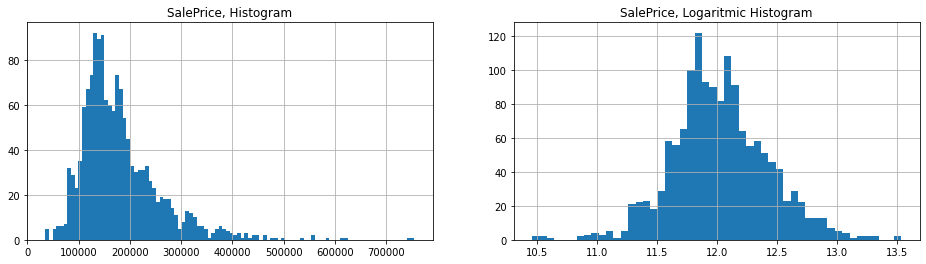

In [19]:
exam_dependent_variable(df, "SalePrice")

# Correlation Analysis

In [20]:
df.corr()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000,0.009,-0.028,-0.041,-0.030,-0.003,-0.017,-0.050,-0.025,-0.017,0.018,-0.014,-0.025,-0.009,-0.022,-0.038,-0.029,0.000,0.010,-0.010,-0.015,0.003,-0.012,-0.029,-0.035,-0.027,-0.010,-0.009,-0.007,0.010,0.022,-0.047,0.022,0.014,0.008,0.006,-0.256,-0.022
MSSubClass,0.009,1.000,-0.417,-0.202,0.034,-0.066,0.034,0.043,0.005,-0.064,-0.073,-0.126,-0.220,-0.249,0.309,0.026,0.072,0.010,-0.002,0.139,0.179,-0.009,0.260,0.041,-0.055,0.088,-0.047,-0.103,-0.018,-0.016,-0.021,-0.038,-0.049,-0.003,-0.029,-0.001,-0.015,-0.084
LotFrontage,-0.028,-0.417,1.000,0.490,0.218,-0.076,0.123,0.092,0.221,0.219,0.047,0.114,0.355,0.458,0.027,0.005,0.382,0.113,-0.026,0.182,0.039,0.235,0.005,0.350,0.262,0.077,0.311,0.360,0.122,0.165,0.012,0.028,0.076,0.174,0.044,0.011,-0.008,0.352
LotArea,-0.041,-0.202,0.490,1.000,0.101,-0.036,0.024,0.022,0.126,0.194,0.084,0.021,0.254,0.332,0.032,0.001,0.285,0.128,0.026,0.126,0.034,0.133,-0.021,0.214,0.261,-0.009,0.180,0.213,0.158,0.105,0.021,0.016,0.054,0.094,0.069,0.004,-0.024,0.264
OverallQual,-0.030,0.034,0.218,0.101,1.000,-0.094,0.598,0.572,0.433,0.282,-0.043,0.275,0.549,0.479,0.246,-0.048,0.575,0.165,-0.041,0.528,0.273,0.073,-0.159,0.390,0.391,0.572,0.601,0.565,0.255,0.298,-0.139,0.019,0.043,0.031,0.006,0.030,-0.020,0.791
OverallCond,-0.003,-0.066,-0.076,-0.036,-0.094,1.000,-0.368,0.048,-0.136,-0.050,0.042,-0.138,-0.174,-0.157,0.005,0.009,-0.117,-0.042,0.084,-0.216,-0.089,-0.008,-0.087,-0.092,-0.031,-0.326,-0.182,-0.154,0.020,-0.069,0.071,0.044,0.044,-0.017,0.034,-0.006,0.030,-0.078
YearBuilt,-0.017,0.034,0.123,0.024,0.598,-0.368,1.000,0.612,0.314,0.280,-0.028,0.130,0.409,0.311,0.018,-0.144,0.243,0.212,-0.030,0.471,0.270,-0.053,-0.138,0.114,0.171,0.835,0.538,0.481,0.229,0.199,-0.374,0.016,-0.041,0.002,-0.011,0.014,-0.012,0.523
YearRemodAdd,-0.050,0.043,0.092,0.022,0.572,0.048,0.612,1.000,0.197,0.152,-0.062,0.165,0.298,0.242,0.159,-0.060,0.317,0.135,-0.046,0.458,0.211,-0.022,-0.142,0.198,0.134,0.652,0.426,0.377,0.219,0.242,-0.220,0.037,-0.047,-0.011,-0.003,0.018,0.033,0.507
MasVnrArea,-0.025,0.005,0.221,0.126,0.433,-0.136,0.314,0.197,1.000,0.303,-0.016,0.090,0.397,0.396,0.121,-0.058,0.403,0.142,0.015,0.260,0.192,0.078,-0.051,0.278,0.275,0.255,0.361,0.374,0.166,0.145,-0.111,0.014,0.065,0.005,0.045,-0.000,-0.019,0.477
BsmtFinSF1,-0.017,-0.064,0.219,0.194,0.282,-0.050,0.280,0.152,0.303,1.000,-0.055,-0.477,0.536,0.458,-0.162,-0.066,0.212,0.639,0.078,0.082,-0.007,-0.114,-0.086,0.052,0.293,0.194,0.255,0.310,0.223,0.124,-0.100,0.051,0.097,0.084,0.093,-0.001,0.023,0.386


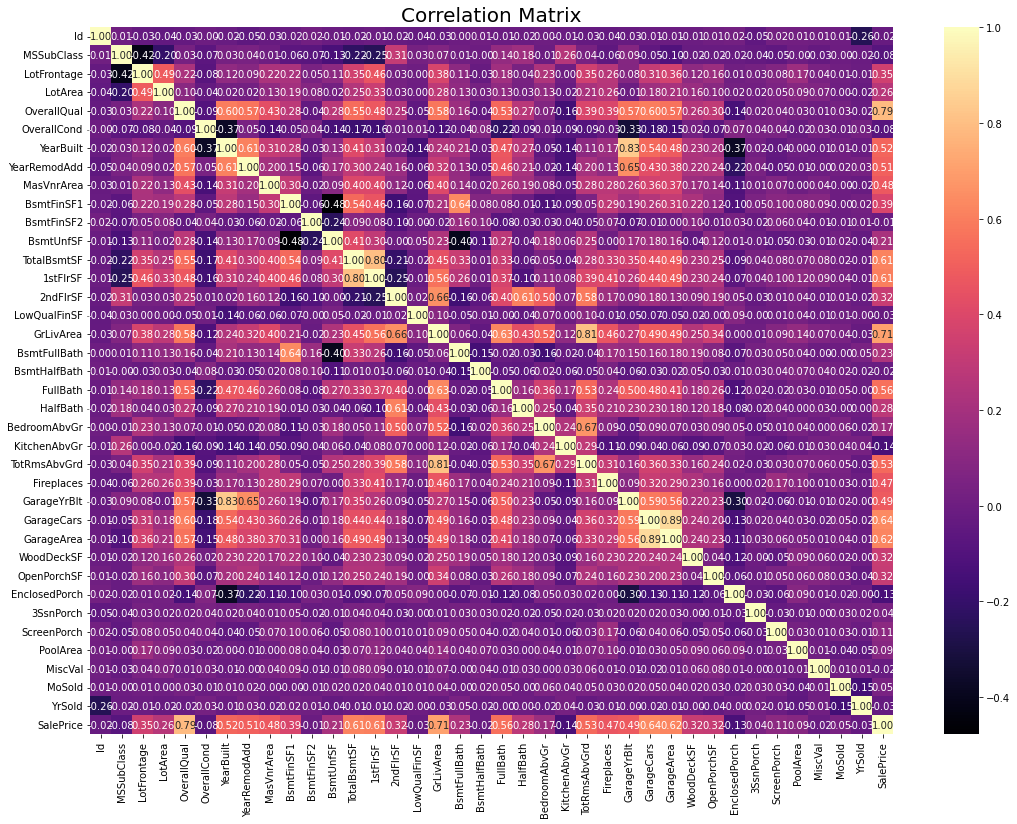

In [21]:
f, ax = plt.subplots(figsize=[18, 13])
sns.heatmap(df.corr(), annot=True, fmt=".2f", ax=ax, cmap="magma")
ax.set_title("Correlation Matrix", fontsize=20)
plt.show()

In [22]:
def high_correlated_cols(dataframe, plot=False, corr_th = 0.90):
  corr = dataframe.corr()
  corr_matrix = corr.abs()
  upper_triangle_matrix = corr_matrix.where(np.triu(np.ones(corr_matrix.shape),k=1).astype(np.bool))
  drop_list = [col for col in upper_triangle_matrix.columns if any(upper_triangle_matrix[col] > corr_th)]

  if drop_list == []:
    print("############## After Correlation Analysis, You Don't Need to Remove Variables ##############")

  if plot:
    sns.set(rc = {'figure.figsize':(18,13)})
    sns.heatmap(corr, cmap="RdBu")
    plt.show()
  return drop_list

<ipython-input-22-dcff60c12093>:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper_triangle_matrix = corr_matrix.where(np.triu(np.ones(corr_matrix.shape),k=1).astype(np.bool))


############## After Correlation Analysis, You Don't Need to Remove Variables ##############


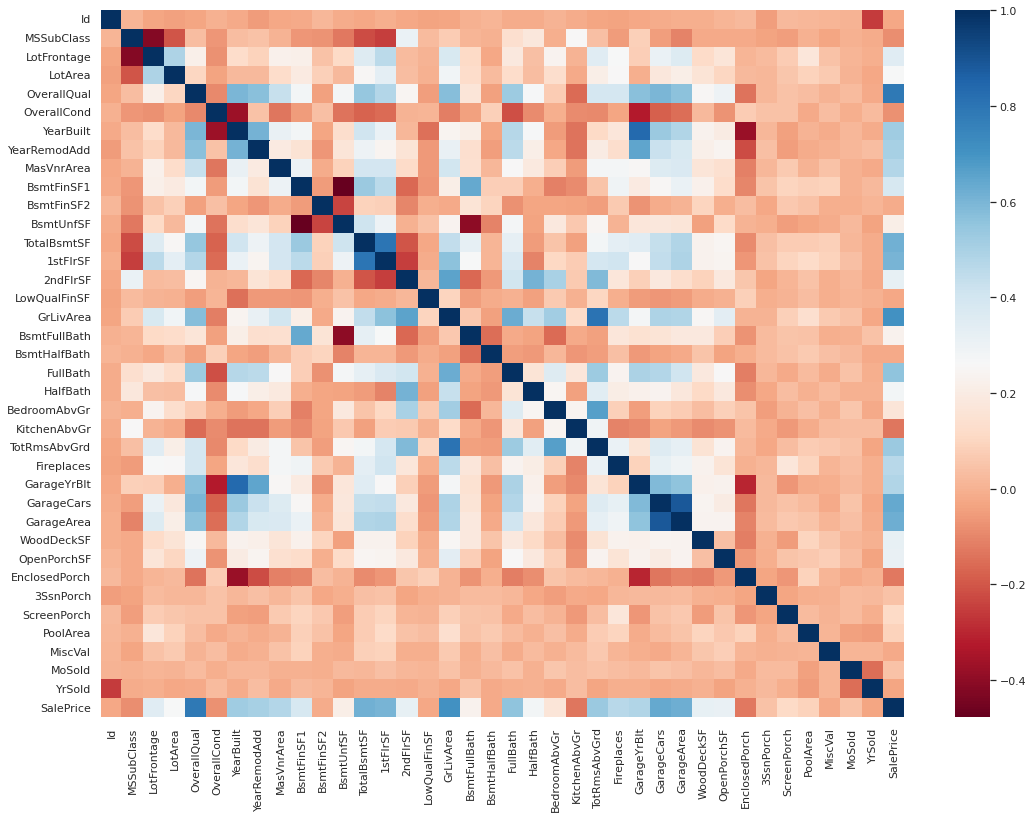

[]

In [23]:
high_correlated_cols(df, plot=True)

# Exploratory Data Analysis

In [24]:
import scipy.stats as stats
def exploratory_data(dataframe):
  import warnings
  warnings.filterwarnings('ignore')
  cat_cols, num_cols, cat_but_car, num_but_cat = grab_col_names(dataframe)
  fig,ax = plt.subplots(len(num_cols),3,figsize=(20,90))
  # sns.set(font_scale=2)
  for index, col in enumerate(num_cols):
    sns.distplot(dataframe[col],ax=ax[index,0])
    sns.boxplot(dataframe[col],ax=ax[index,1])
    stats.probplot(dataframe[col],plot=ax[index,2])
  fig.tight_layout()
  fig.subplots_adjust(top=0.95)
  plt.suptitle("Visualizing Continuous Columns")

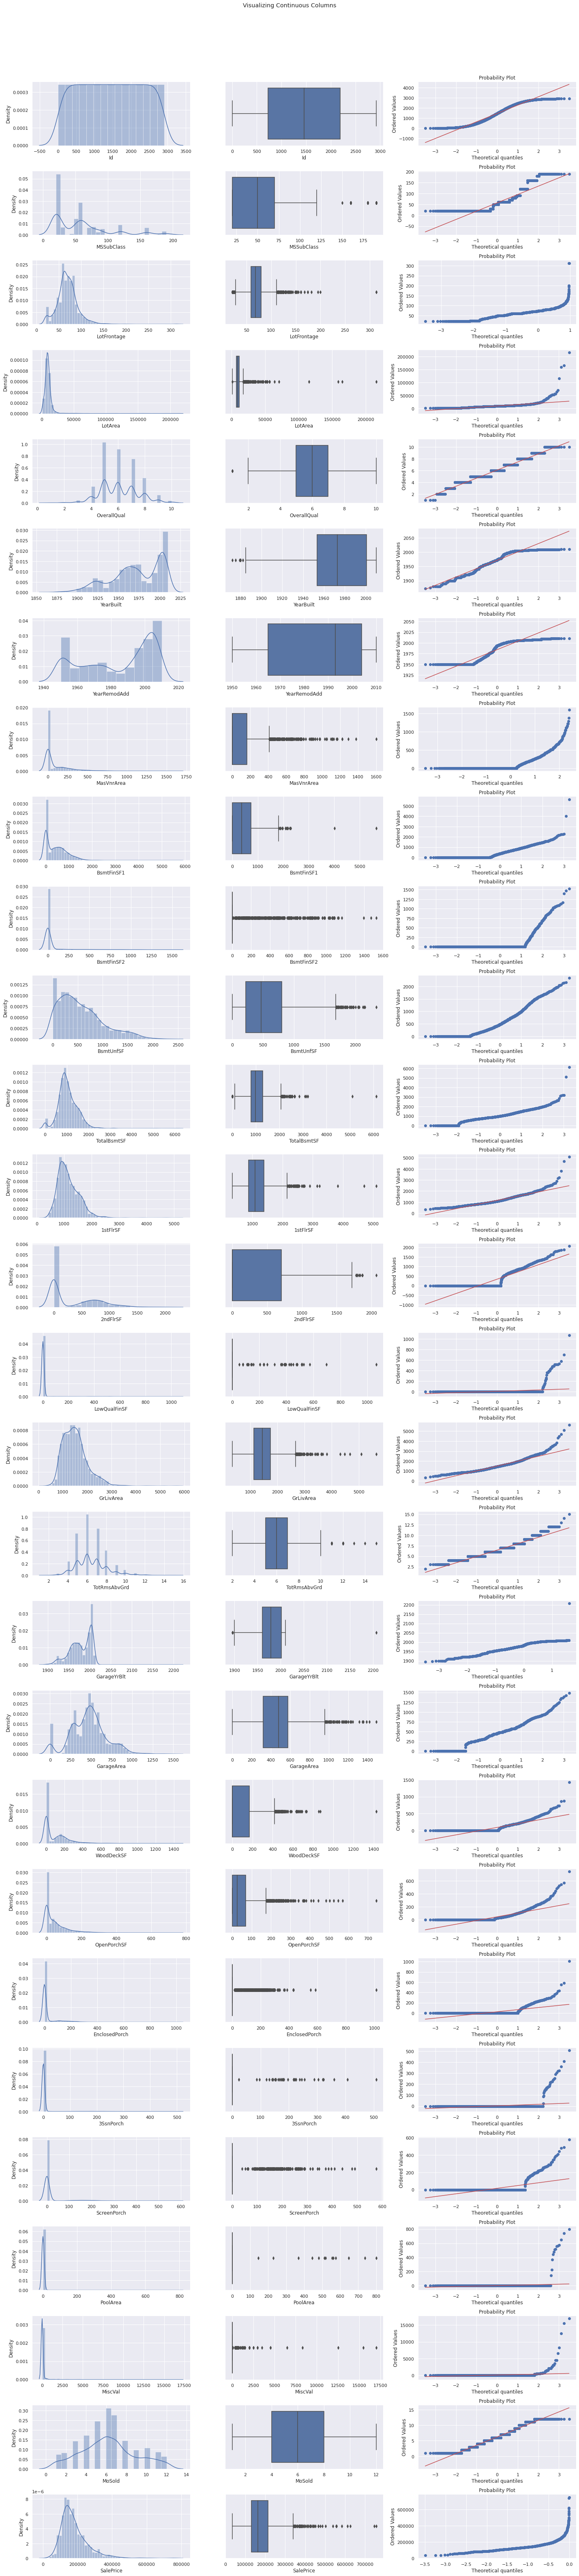

In [25]:
exploratory_data(df)

# Outlier Analysis

In [26]:
def outlier_thresholds(dataframe,col_name,q1=0.10,q3=0.90):
  quartile1 = dataframe[col_name].quantile(q1)
  quartile3 = dataframe[col_name].quantile(q3)
  interquartile_range = quartile3 - quartile1
  low_limit = quartile1 - 1.5 * interquartile_range
  up_limit = quartile3 + 1.5 * interquartile_range
  return low_limit,up_limit

In [27]:
def check_outlier(dataframe, col_name):
  low_limit,up_limit = outlier_thresholds(dataframe,col_name)
  if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
    return True
  else:
    return False

In [28]:
def replace_with_thresholds(dataframe, col_name):
  low_limit, up_limit = outlier_thresholds(dataframe, col_name)
  dataframe.loc[(dataframe[col_name] < low_limit), col_name] = low_limit
  dataframe.loc[(dataframe[col_name] > up_limit), col_name] = up_limit

In [29]:
def solve_outliers(dataframe, target):
  cat_cols, num_cols, cat_but_car, num_but_cat = grab_col_names(dataframe)
  for col in num_cols:
    if col!=target:
      print(col, check_outlier(dataframe, col))
      if check_outlier(dataframe, col):
        replace_with_thresholds(dataframe, col)

In [30]:
solve_outliers(df, "SalePrice")

Id False
MSSubClass False
LotFrontage True
LotArea True
OverallQual False
YearBuilt False
YearRemodAdd False
MasVnrArea True
BsmtFinSF1 True
BsmtFinSF2 True
BsmtUnfSF False
TotalBsmtSF True
1stFlrSF True
2ndFlrSF False
LowQualFinSF True
GrLivArea True
TotRmsAbvGrd True
GarageYrBlt True
GarageArea False
WoodDeckSF True
OpenPorchSF True
EnclosedPorch True
3SsnPorch True
ScreenPorch True
PoolArea True
MiscVal True
MoSold False


In [31]:
def check_outlier_df(dataframe, target):
  cat_cols, num_cols, cat_but_car, num_but_cat = grab_col_names(dataframe)
  for col in num_cols:
    if col!=target:
      print(col, check_outlier(dataframe, col))

In [32]:
check_outlier_df(df, "SalePrice")

Id False
MSSubClass False
LotFrontage False
LotArea False
OverallQual False
YearBuilt False
YearRemodAdd False
MasVnrArea False
BsmtFinSF1 False
BsmtFinSF2 False
BsmtUnfSF False
TotalBsmtSF False
1stFlrSF False
2ndFlrSF False
GrLivArea False
TotRmsAbvGrd False
GarageYrBlt False
GarageArea False
WoodDeckSF False
OpenPorchSF False
EnclosedPorch False
MoSold False


# Missing Value Analysis

In [33]:
def missing_value_table(dataframe, na_name=False):
  na_columns = [col for col in dataframe.columns if dataframe[col].isnull().sum() > 0]
  n_miss = dataframe[na_columns].isnull().sum().sort_values(ascending=False)
  ratio = (dataframe[na_columns].isnull().sum() / dataframe.shape[0] * 100).sort_values(ascending=False)
  missing_df = pd.concat([n_miss, np.round(ratio, 2)], axis=1, keys=["n_miss","ratio"])
  print(missing_df, end="\n")
  if na_name:
    return na_columns

In [34]:
na_columns = missing_value_table(df, na_name=True)

              n_miss  ratio
PoolQC          2909 99.660
MiscFeature     2814 96.400
Alley           2721 93.220
Fence           2348 80.440
SalePrice       1459 49.980
FireplaceQu     1420 48.650
LotFrontage      486 16.650
GarageCond       159  5.450
GarageYrBlt      159  5.450
GarageFinish     159  5.450
GarageQual       159  5.450
GarageType       157  5.380
BsmtExposure      82  2.810
BsmtCond          82  2.810
BsmtQual          81  2.770
BsmtFinType2      80  2.740
BsmtFinType1      79  2.710
MasVnrType        24  0.820
MasVnrArea        23  0.790
MSZoning           4  0.140
Functional         2  0.070
BsmtHalfBath       2  0.070
BsmtFullBath       2  0.070
Utilities          2  0.070
KitchenQual        1  0.030
TotalBsmtSF        1  0.030
BsmtUnfSF          1  0.030
GarageCars         1  0.030
GarageArea         1  0.030
BsmtFinSF2         1  0.030
BsmtFinSF1         1  0.030
Exterior2nd        1  0.030
Exterior1st        1  0.030
SaleType           1  0.030
Electrical         1

In [35]:
# Note: Null values in some variables indicate that the house does not have that feature.
no_cols = ["Alley","BsmtQual","BsmtCond","BsmtExposure","BsmtFinType1","BsmtFinType2","FireplaceQu",
           "GarageType","GarageFinish","GarageQual","GarageCond","PoolQC","Fence","MiscFeature"]

for col in no_cols:
  df[col].fillna("No",inplace=True)

In [36]:
na_columns = missing_value_table(df, na_name=True)

              n_miss  ratio
SalePrice       1459 49.980
LotFrontage      486 16.650
GarageYrBlt      159  5.450
MasVnrType        24  0.820
MasVnrArea        23  0.790
MSZoning           4  0.140
BsmtFullBath       2  0.070
BsmtHalfBath       2  0.070
Functional         2  0.070
Utilities          2  0.070
Exterior2nd        1  0.030
BsmtFinSF1         1  0.030
BsmtFinSF2         1  0.030
BsmtUnfSF          1  0.030
Exterior1st        1  0.030
Electrical         1  0.030
KitchenQual        1  0.030
GarageCars         1  0.030
GarageArea         1  0.030
SaleType           1  0.030
TotalBsmtSF        1  0.030


In [37]:
# Show Miising Value on Plot
def show_missing_value_plot(dataframe, bar=True, matrix=True, heatmap=True):
  if bar:
    msno.bar(dataframe);
  if matrix:
    msno.matrix(dataframe);
  if heatmap:
    msno.heatmap(dataframe);

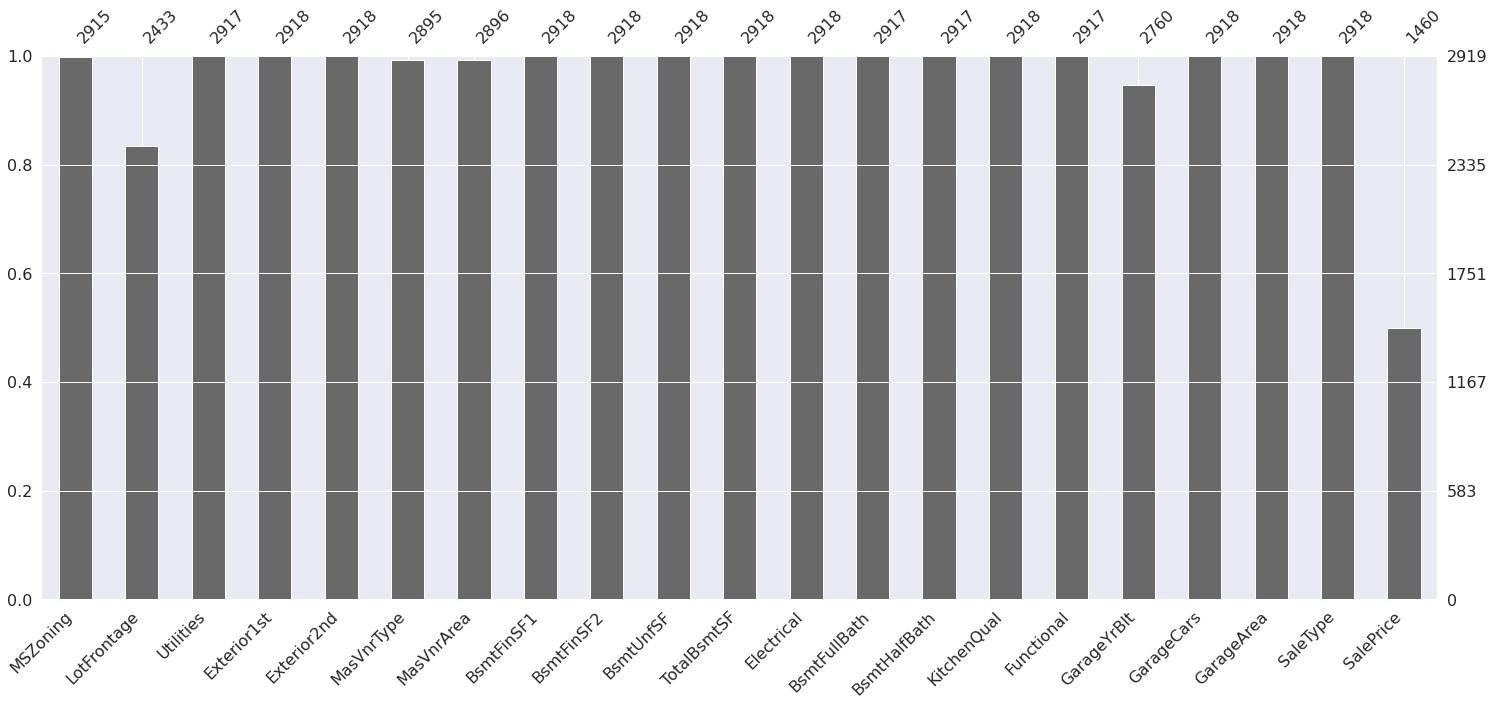

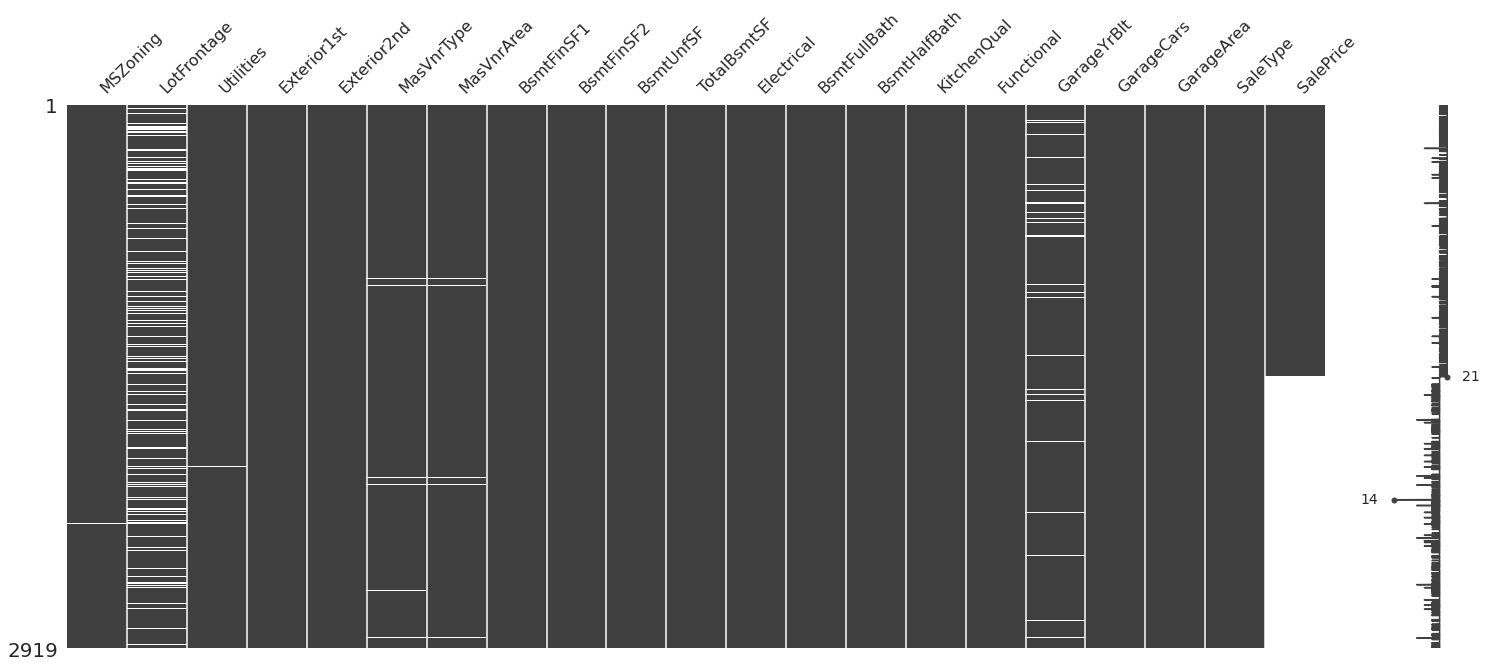

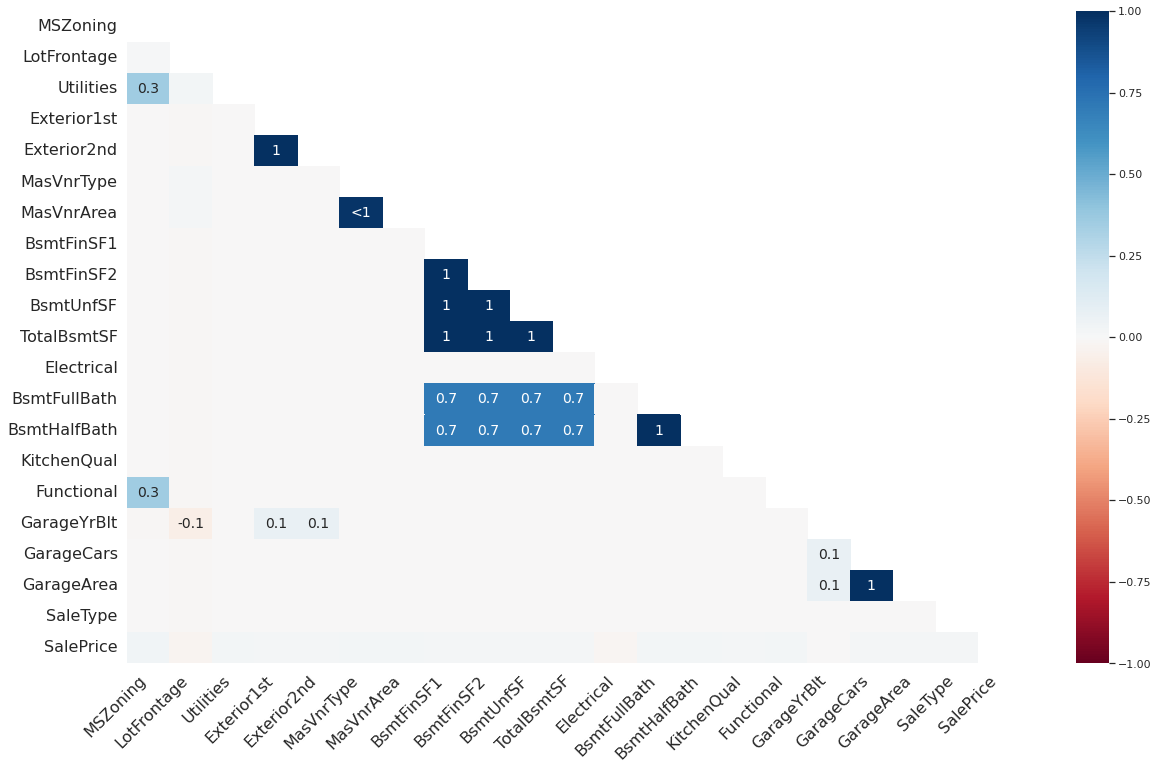

In [38]:
show_missing_value_plot(df[na_columns])

In [39]:
# Examining the Relationship of Missing Values with the Dependent Variable
def missing_vs_target(dataframe, target):
  na_columns = missing_value_table(dataframe, na_name=True)
  temp_df = dataframe.copy()
  for col in na_columns:
    temp_df[col + "_NA_FLAG"] = np.where(temp_df[col].isnull(), 1, 0)
  na_flags = temp_df.loc[:, temp_df.columns.str.contains("_NA_")].columns
  for col in na_flags:
    print(pd.DataFrame({"TARGET_MEAN": temp_df.groupby(col)[target].mean(),
                        "Count": temp_df.groupby(col)[target].count()}))
    print("##################################################")

In [40]:
missing_vs_target(df, "SalePrice")

              n_miss  ratio
SalePrice       1459 49.980
LotFrontage      486 16.650
GarageYrBlt      159  5.450
MasVnrType        24  0.820
MasVnrArea        23  0.790
MSZoning           4  0.140
BsmtFullBath       2  0.070
BsmtHalfBath       2  0.070
Functional         2  0.070
Utilities          2  0.070
Exterior2nd        1  0.030
BsmtFinSF1         1  0.030
BsmtFinSF2         1  0.030
BsmtUnfSF          1  0.030
Exterior1st        1  0.030
Electrical         1  0.030
KitchenQual        1  0.030
GarageCars         1  0.030
GarageArea         1  0.030
SaleType           1  0.030
TotalBsmtSF        1  0.030
                  TARGET_MEAN  Count
MSZoning_NA_FLAG                    
0                  180921.196   1460
1                         NaN      0
##################################################
                     TARGET_MEAN  Count
LotFrontage_NA_FLAG                    
0                     180770.480   1201
1                     181620.073    259
#########################

In [41]:
def quick_missing_imp(data, target, num_method="meidan", cat_length=20):
  variables_with_na = [col for col in data.columns if data[col].isnull().sum() > 0]
  temp_target = data[target]

  print("# BEFORE")
  print(data[variables_with_na].isnull().sum(), "\n\n")

  data = data.apply(lambda x: x.fillna(x.mode()[0]) if (x.dtype == "O" and len(x.unique()) <= cat_length) else x, axis=0)
  if num_method == "mean":
      data = data.apply(lambda x: x.fillna(x.mean()) if x.dtype != "O" else x, axis=0)
  elif num_method == "median":
      data = data.apply(lambda x: x.fillna(x.median()) if x.dtype != "O" else x, axis=0)
  data[target] = temp_target

  print("# AFTER \n Imputation method is 'MODE' for categorical variables!")
  print(" Imputation method is '" + num_method.upper() + "' for numeric variables! \n")
  print(data[variables_with_na].isnull().sum(), "\n\n")

  return data

In [42]:
df = quick_missing_imp(df, "SalePrice", num_method="median", cat_length=17)

# BEFORE
MSZoning           4
LotFrontage      486
Utilities          2
Exterior1st        1
Exterior2nd        1
MasVnrType        24
MasVnrArea        23
BsmtFinSF1         1
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
Electrical         1
BsmtFullBath       2
BsmtHalfBath       2
KitchenQual        1
Functional         2
GarageYrBlt      159
GarageCars         1
GarageArea         1
SaleType           1
SalePrice       1459
dtype: int64 


# AFTER 
 Imputation method is 'MODE' for categorical variables!
 Imputation method is 'MEDIAN' for numeric variables! 

MSZoning           0
LotFrontage        0
Utilities          0
Exterior1st        0
Exterior2nd        0
MasVnrType         0
MasVnrArea         0
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
Electrical         0
BsmtFullBath       0
BsmtHalfBath       0
KitchenQual        0
Functional         0
GarageYrBlt        0
GarageCars         0
GarageArea         0
SaleType      

In [43]:
def rare_analyser(dataframe, target):
  cat_cols, num_cols, cat_but_car, num_but_cat = grab_col_names(dataframe)
  for col in cat_cols:
    print(col, ":", len(dataframe[col].value_counts()))
    print(pd.DataFrame({"COUNT": dataframe[col].value_counts(),
                        "Ratio": dataframe[col].value_counts() / len(dataframe),
                        "TARGET_MEAN": dataframe.groupby(col)[target].mean()}), end="\n\n\n")

In [44]:
rare_analyser(df, "SalePrice")

MSZoning : 5
         COUNT  Ratio  TARGET_MEAN
C (all)     25  0.009    74528.000
FV         139  0.048   214014.062
RH          26  0.009   131558.375
RL        2269  0.777   191004.995
RM         460  0.158   126316.830


Street : 2
      COUNT  Ratio  TARGET_MEAN
Grvl     12  0.004   130190.500
Pave   2907  0.996   181130.539


Alley : 3
      COUNT  Ratio  TARGET_MEAN
Grvl    120  0.041   122219.080
No     2721  0.932   183452.131
Pave     78  0.027   168000.585


LotShape : 4
     COUNT  Ratio  TARGET_MEAN
IR1    968  0.332   206101.665
IR2     76  0.026   239833.366
IR3     16  0.005   216036.500
Reg   1859  0.637   164754.818


LandContour : 4
     COUNT  Ratio  TARGET_MEAN
Bnk    117  0.040   143104.079
HLS    120  0.041   231533.940
Low     60  0.021   203661.111
Lvl   2622  0.898   180183.747


Utilities : 2
        COUNT  Ratio  TARGET_MEAN
AllPub   2918  1.000   180950.957
NoSeWa      1  0.000   137500.000


LotConfig : 5
         COUNT  Ratio  TARGET_MEAN
Corner     511  

In [45]:
def rare_encoder(dataframe, rare_prec):
  temp_df = dataframe.copy()
  rare_columns = [col for col in temp_df.columns if temp_df[col].dtypes in ["category","object"]
                  and (temp_df[col].value_counts() / len(temp_df) < rare_prec).any(axis=None)]
  for var in rare_columns:
    tmp = temp_df[var].value_counts() / len(temp_df)
    rare_labels = tmp[tmp < rare_prec].index
    temp_df[var] = np.where(temp_df[var].isin(rare_labels), "Rare", temp_df[var])
  return temp_df

In [46]:
new_df = rare_encoder(df, 0.01)

# Feature Extraction

In [47]:
df["NEW_1st*GrLiv"] = df["1stFlrSF"] * df["GrLivArea"]

df["NEW_Garage*GrLiv"] = (df["GarageArea"] * df["GrLivArea"])

df["TotalQual"] = df[["OverallQual", "OverallCond", "ExterQual", "ExterCond", "BsmtCond", "BsmtFinType1",
                      "BsmtFinType2", "HeatingQC", "KitchenQual", "Functional", "FireplaceQu", "GarageQual", "GarageCond", "Fence"]].sum(axis = 1) # 42

# Total Floor
df["NEW_TotalFlrSF"] = df["1stFlrSF"] + df["2ndFlrSF"] # 32

# Total Finished Basement Area
df["NEW_TotalBsmtFin"] = df.BsmtFinSF1 + df.BsmtFinSF2 # 56

# Porch Area
df["NEW_PorchArea"] = df.OpenPorchSF + df.EnclosedPorch + df.ScreenPorch + df["3SsnPorch"] + df.WoodDeckSF # 93

# Total House Area
df["NEW_TotalHouseArea"] = df.NEW_TotalFlrSF + df.TotalBsmtSF # 156

df["NEW_TotalSqFeet"] = df.GrLivArea + df.TotalBsmtSF # 35

# Lot Ratio
df["NEW_LotRatio"] = df.GrLivArea / df.LotArea # 64

df["NEW_RatioArea"] = df.NEW_TotalHouseArea / df.LotArea # 57

df["NEW_GarageLotRatio"] = df.GarageArea / df.LotArea # 69

# MasVnrArea
df["NEW_MasVnrRatio"] = df.MasVnrArea / df.NEW_TotalHouseArea # 36

# Dif Area
df["NEW_DifArea"] = (df.LotArea - df["1stFlrSF"] - df.GarageArea - df.NEW_PorchArea - df.WoodDeckSF) # 73

df["NEW_OverallGrade"] = df["OverallQual"] * df["OverallCond"] # 61

df["NEW_Restoration"] = df.YearRemodAdd - df.YearBuilt # 31

df["NEW_HouseAge"] = df.YrSold - df.YearBuilt # 73

df["NEW_RestorationAge"] = df.YrSold - df.YearRemodAdd # 40

df["NEW_GarageAge"] = df.GarageYrBlt - df.YearBuilt # 17

df["NEW_GarageRestorationAge"] = np.abs(df.GarageYrBlt - df.YearRemodAdd) # 30

df["NEW_GarageSold"] = df.YrSold - df.GarageYrBlt # 48

In [48]:
drop_list = ["Street", "Alley", "LandContour", "Utilities", "LandSlope","Heating", "PoolQC", "MiscFeature","Neighborhood"]
df.drop(drop_list, axis=1, inplace=True)

# Encoding Scaling

In [49]:
def label_encoding(dataframe, binary_col):
  labelencoder = LabelEncoder()
  dataframe[binary_col] = labelencoder.fit_transform(dataframe[binary_col])
  return dataframe

In [50]:
def label_encoder(dataframe):
  binary_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O" and dataframe[col].nunique() == 2]
  for col in binary_cols:
      dataframe = label_encoding(dataframe, col)
  return dataframe

In [51]:
df = label_encoder(df)

In [52]:
def one_hot_encoder(dataframe, target, drop_first=False):
    binary_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O" and dataframe[col].nunique() == 2]
    cat_cols, num_cols, cat_but_car, num_but_cat = grab_col_names(df)
    cat_cols = [col for col in cat_cols if col not in binary_cols and col not in [target]]
    dataframe = pd.get_dummies(dataframe, columns=cat_cols, drop_first=drop_first)
    return dataframe

In [53]:
df = one_hot_encoder(df, "SalePrice", drop_first=True)

# Create a Base Model

In [73]:
def create_base_model(dataframe, target, drop_index_or_id="Id", log1p_=False, plot=False, save_results=False):
  names = []
  train_rmse_results = []
  test_rmse_results = []
  train_r2_scores = []
  test_r2_scores = []
  train_df = dataframe[dataframe[target].notnull()]
  test_df = dataframe[dataframe[target].isnull()]
  
  if log1p_:
    y = np.log1p(train_df[target])
  else:
    y = train_df[target]

  X = train_df.drop([drop_index_or_id, target], axis=1)
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=17)
  models = [('LR', LinearRegression()),
            ("Ridge", Ridge()),
            ("Lasso", Lasso()),
            ("ElasticNet", ElasticNet()),
            ('SVR', SVR()),
            ('KNN', KNeighborsRegressor()),
            ('CART', DecisionTreeRegressor()),
            ('RF', RandomForestRegressor()),
            ("AdaBoost", AdaBoostRegressor()),
            ('BGTrees', BaggingRegressor(bootstrap_features=True)),
            ('GBM', GradientBoostingRegressor()),
            ("XGBoost", XGBRegressor(objective='reg:squarederror')),
            ("LightGBM", LGBMRegressor()),
            ("CatBoost", CatBoostRegressor(verbose=False))]
  print("###################### Mean and Std(Target Variable) ######################")
  print("Mean: " , dataframe[target].mean())
  print("Std: ", dataframe[target].std())
  print("###################### Model Results ######################")

  for name, regressor in models:
    if log1p_:
      model_fit = regressor.fit(X_train, y_train)
      y_train_pred = model_fit.predict(X_train)
      y_test_pred = model_fit.predict(X_test)
      new_y_train_expm = np.expm1(y_train_pred)
      new_y_test_expm = np.expm1(y_test_pred)
      new_y_train = np.expm1(y_train)
      new_y_test = np.expm1(y_test)
      y_train_pred = regressor.predict(X_train)
      y_test_pred = regressor.predict(X_test)
      # RMSE
      train_rmse_result = np.sqrt(mean_squared_error(new_y_train, new_y_train_expm))
      test_rmse_result = np.sqrt(mean_squared_error(new_y_test, new_y_test_expm))
      train_rmse_results.append(train_rmse_result)
      test_rmse_results.append(test_rmse_result)
      # score
      train_r2_score = model_fit.score(X_train, y_train)
      test_r2_score = model_fit.score(X_test, y_test)
      train_r2_scores.append(train_r2_score)
      test_r2_scores.append(test_r2_score)
      # Model names
      names.append(name)
    else:
      regressor.fit(X_train, y_train)
      y_train_pred = regressor.predict(X_train)
      y_test_pred = regressor.predict(X_test)
      # RMSE
      train_rmse_result = np.sqrt(mean_squared_error(y_train, y_train_pred))
      test_rmse_result = np.sqrt(mean_squared_error(y_test, y_test_pred))
      train_rmse_results.append(train_rmse_result)
      test_rmse_results.append(test_rmse_result)
      # score
      train_r2_score = regressor.score(X_train, y_train)
      test_r2_score = regressor.score(X_test, y_test)
      train_r2_scores.append(train_r2_score)
      test_r2_scores.append(test_r2_score)
      # Model names
      names.append(name)
  
  model_results = pd.DataFrame({'Model_Names': names,
                                'RMSE_Train': train_rmse_results,
                                'RMSE_Test': test_rmse_results,
                                'R2_score_Train': train_r2_scores,
                                'R2_score_Test': test_r2_scores
                                }).set_index("Model_Names")
  model_results=model_results.sort_values(by="RMSE_Test", ascending=True)
  print(model_results)

  if plot:
    plt.figure(figsize=(15, 12))
    sns.barplot(x='RMSE_Test', y=model_results.index, data=model_results, color="r")
    plt.xlabel('RMSE Values')
    plt.ylabel('Model Names')
    plt.title('RMSE_Test for All Models')
    plt.show()
  
  if save_results:
    model_results.to_csv("model_results.csv")
  
  return model_results

###################### Mean and Std(Target Variable) ######################
Mean:  180921.19589041095
Std:  79442.50288288662
###################### Model Results ######################
             RMSE_Train  RMSE_Test  R2_score_Train  R2_score_Test
Model_Names                                                      
CatBoost       5119.029  22954.491           0.996          0.914
LightGBM      11168.029  23841.285           0.980          0.908
GBM           13126.207  25081.551           0.973          0.898
XGBoost       13914.120  25304.544           0.969          0.896
RF            10874.921  26860.914           0.981          0.883
ElasticNet    31947.985  27066.687           0.839          0.881
Ridge         23767.327  27264.538           0.911          0.879
BGTrees       13664.495  27625.278           0.971          0.876
AdaBoost      24692.900  30866.634           0.904          0.845
CART              0.000  41453.823           1.000          0.721
KNN           40237.82

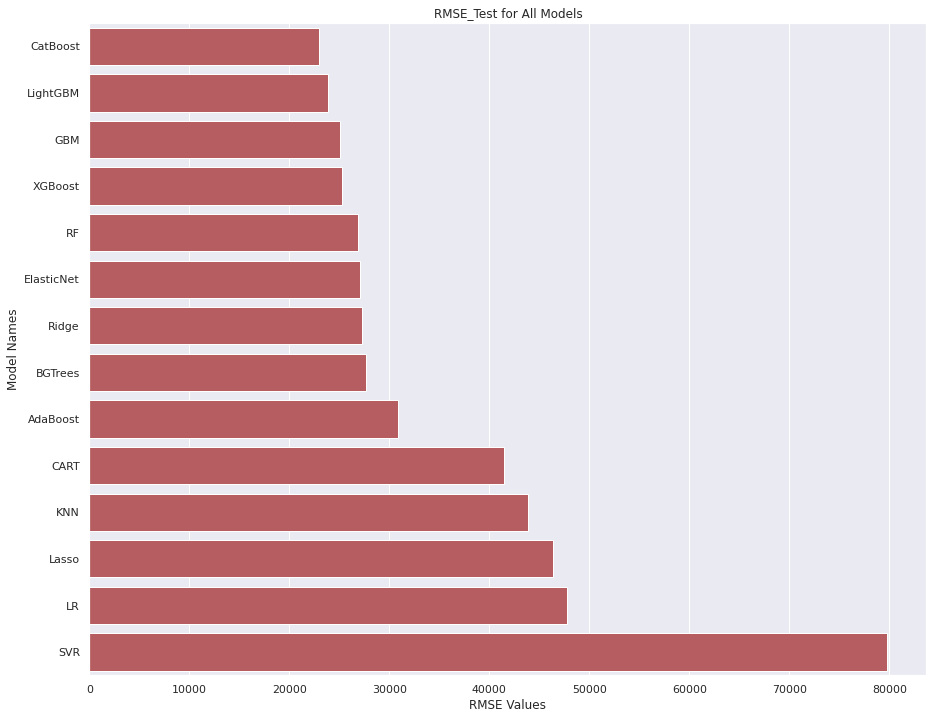

In [62]:
model_results = create_base_model(df, "SalePrice", plot=True, save_results=True)

###################### Mean and Std(Target Variable) ######################
Mean:  180921.19589041095
Std:  79442.50288288662
###################### Model Results ######################
             RMSE_Train  RMSE_Test  R2_score_Train  R2_score_Test
Model_Names                                                      
Ridge         21130.751  22816.661           0.940          0.894
CatBoost       6185.214  22910.867           0.993          0.908
LightGBM       9590.543  23883.703           0.989          0.897
XGBoost       15377.107  24557.584           0.960          0.896
GBM           14898.415  24818.626           0.961          0.895
RF            11657.243  25426.658           0.982          0.888
LR            18661.996  25569.968           0.948          0.817
ElasticNet    34415.357  28158.054           0.851          0.865
BGTrees       15246.549  28233.076           0.973          0.866
AdaBoost      29896.448  30138.680           0.872          0.845
Lasso         38090.76

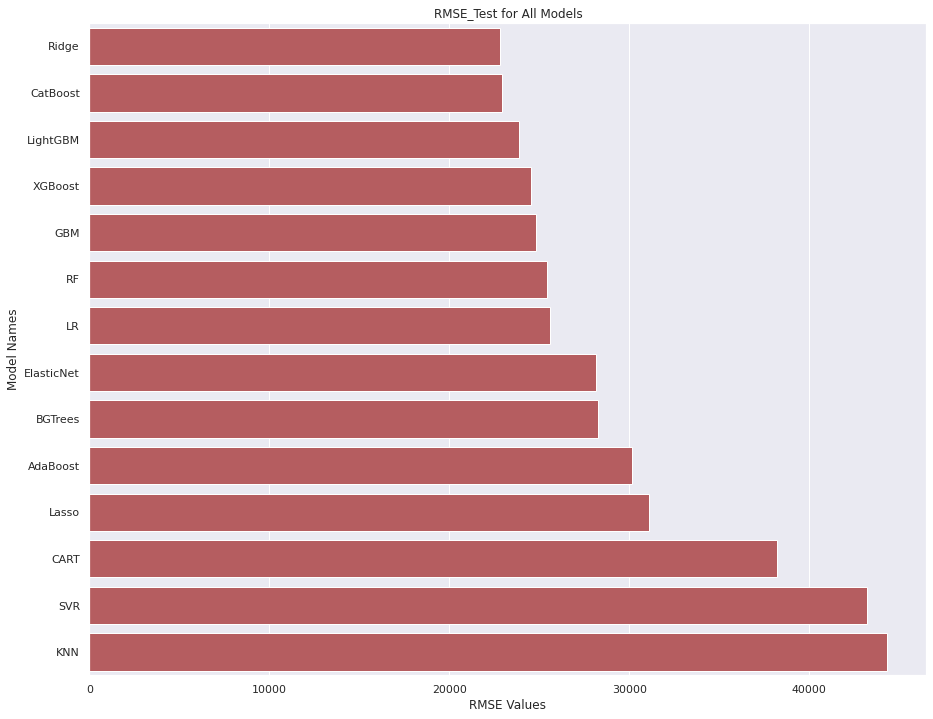

In [74]:
model_results = create_base_model(df, "SalePrice", log1p_=True, plot=True, save_results=True)

# Create Model Tuned

In [79]:
def create_model_tuned(dataframe, target, drop_index_or_id="Id", plot=True, save_results=True):
  names = []
  train_rmse_results = []
  test_rmse_results = []
  train_r2_scores = []
  test_r2_scores = []
  best_params = []

  train_df = dataframe[dataframe[target].notnull()]
  test_df = dataframe[dataframe[target].isnull()]
  y = train_df[target]
  X = train_df.drop([drop_index_or_id, target], axis=1)
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=17)

  ridge_params = {"alpha": 10**np.linspace(10,-2,100)*0.5}

  lasso_params = {"alpha": 10**np.linspace(10,-2,100)*0.5}

  enet_params = {"alpha": 10**np.linspace(10,-2,100)*0.5}

  svr_params = {"C": np.arange(0.1,1,0.1)}

  knn_params = {"n_neighbors": np.arange(1,50,1)}

  cart_params = {"min_samples_split": range(2,100),
                  "max_leaf_nodes": range(2,10)}

  adaboost_params = {"learning_rate": [0.01, 0.1],
                            "loss": ["linear", "square", "exponential"],
                            "n_estimators": [100, 500, 1000]}

  xgboost_params = {"colsample_bytree": [0.4, 0.5 ,0.6],
                      "n_estimators": [200, 500, 1000],
                      "max_depth": [3,5,8],
                      "learning_rate": [0.1, 0.01]}

  rf_params = {"max_depth": [5, 8, 15, None],
              "max_features": [5, 7, "auto"],
              "min_samples_split": [8, 15, 20],
              "n_estimators": [200, 500]}

  gbm_params = {"learning_rate": [0.01, 0.1],
              "max_depth": [3, 8],
              "n_estimators": [500, 1000],
              "subsample": [1, 0.5, 0.7]}

  lightgbm_params = {"learning_rate": [0.01, 0.1],
                    "n_estimators": [300, 500],
                    "colsample_bytree": [0.7, 1]}

  catboost_params = {"iterations": [200, 500],
                    "learning_rate": [0.01, 0.1],
                    "depth": [3, 6]}
  regressors = [("Ridge", Ridge(), ridge_params),
              ("Lasso", Lasso(), lasso_params),
              ("ENet", ElasticNet(), enet_params),
              ("SVR", SVR(), svr_params),
              ("KNN", KNeighborsRegressor(), knn_params),
              ("CART", DecisionTreeRegressor(), cart_params),
              ("AdaBoost", AdaBoostRegressor(), adaboost_params),
              ("XGBoost", XGBRegressor(objective="reg:squarederror"), xgboost_params),
              ("RF", RandomForestRegressor(), rf_params),
              ('GBM', GradientBoostingRegressor(), gbm_params),
              ('LightGBM', LGBMRegressor(), lightgbm_params),
              ("CatBoost", CatBoostRegressor(verbose=False), catboost_params)]

  for name, regressor, params in regressors:
    print(f"#################### {name} ####################")

    gs_best = GridSearchCV(regressor, params, cv=3, n_jobs=-1, verbose=False).fit(X_train, y_train)

    final_model = regressor.set_params(**gs_best.best_params_).fit(X_train, y_train)
    train_rmse_result = np.mean(np.sqrt(-cross_val_score(final_model, X_train, y_train, cv=10, scoring="neg_mean_squared_error")))
    test_rmse_result = np.mean(np.sqrt(-cross_val_score(final_model, X_test, y_test, cv=10, scoring="neg_mean_squared_error")))
    train_rmse_results.append(train_rmse_result)
    test_rmse_results.append(test_rmse_result)
    train_r2_score = final_model.score(X_train, y_train)
    test_r2_score = final_model.score(X_test, y_test)
    train_r2_scores.append(train_r2_score)
    test_r2_scores.append(test_r2_score)
    print(f"RMSE_Train: {round(train_rmse_result, 4)} , RMSE_Test: {round(test_rmse_result, 4)} , R2_Train: {round(train_r2_score, 3)} , R2_Test: {round(test_r2_score, 3)} (Tuned Model) ({name}) ")

    print(f"{name} best params: {gs_best.best_params_}", end="\n\n")
    best_params.append(gs_best.best_params_)
    names.append(name)
  
  model_tuned_results = pd.DataFrame({'Model_Names': names,
                                'RMSE_Train': train_rmse_results,
                                'RMSE_Test': test_rmse_results,
                                'R2_score_Train': train_r2_scores,
                                'R2_score_Test': test_r2_scores,
                                "best_params": best_params
                                }).set_index("Model_Names")
  model_tuned_results=model_tuned_results.sort_values(by="RMSE_Test", ascending=True)
  print(model_tuned_results)

  if plot:
    plt.figure(figsize=(15, 12))
    sns.barplot(x='RMSE_Test', y=model_tuned_results.index, data=model_tuned_results, color="r")
    plt.xlabel('RMSE Values')
    plt.ylabel('Model Names')
    plt.title('RMSE_Test for All Models')
    plt.show()
  
  if save_results:
    model_tuned_results.to_csv("model_tuned_results.csv")
  
  return model_tuned_results

#################### Ridge ####################
RMSE_Train: 32452.1803 , RMSE_Test: 26453.1421 , R2_Train: 0.886 , R2_Test: 0.895 (Tuned Model) (Ridge) 
Ridge best params: {'alpha': 21.643806405415308}

#################### Lasso ####################
RMSE_Train: 32634.7961 , RMSE_Test: 26901.2584 , R2_Train: 0.867 , R2_Test: 0.895 (Tuned Model) (Lasso) 
Lasso best params: {'alpha': 352.74011553593226}

#################### ENet ####################
RMSE_Train: 32466.1366 , RMSE_Test: 26863.2201 , R2_Train: 0.884 , R2_Test: 0.896 (Tuned Model) (ENet) 
ENet best params: {'alpha': 0.0466301673441609}

#################### SVR ####################
RMSE_Train: 81138.9447 , RMSE_Test: 79936.335 , R2_Train: -0.044 , R2_Test: -0.032 (Tuned Model) (SVR) 
SVR best params: {'C': 0.9}

#################### KNN ####################
RMSE_Train: 45944.2696 , RMSE_Test: 47800.9201 , R2_Train: 0.697 , R2_Test: 0.666 (Tuned Model) (KNN) 
KNN best params: {'n_neighbors': 19}

#################### CART ##

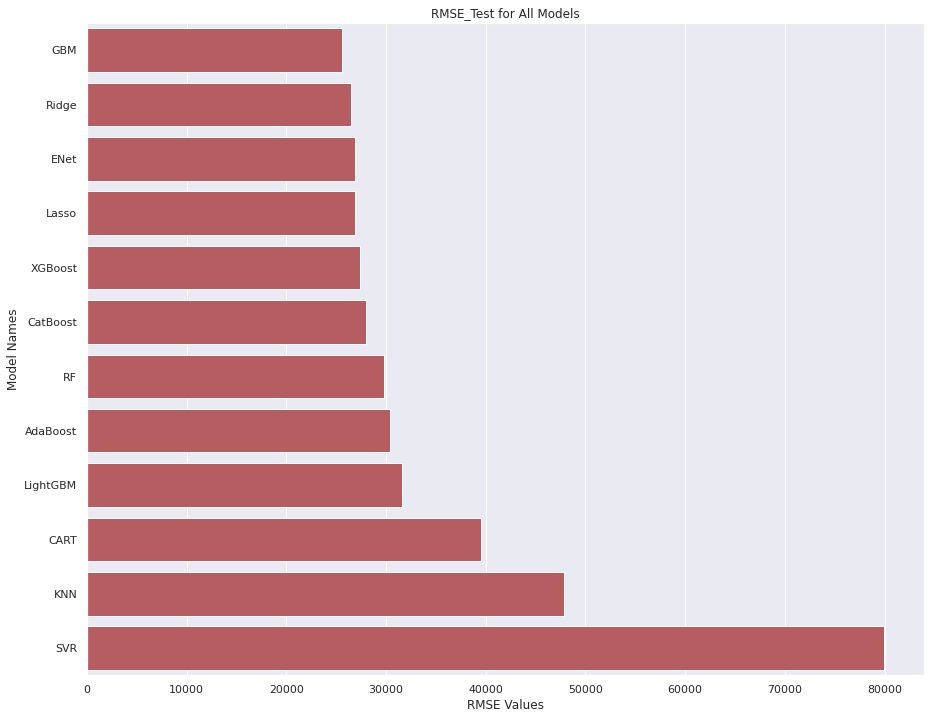

In [80]:
model_tuned_results = create_model_tuned(df, "SalePrice", plot=True, save_results=True)

# Kaggle Submit Model

In [95]:
def Kaggle_Submit_Model(dataframe, target, drop_index_or_id="Id"):
  train_df = dataframe[dataframe[target].notnull()]
  test_df = dataframe[dataframe[target].isnull()]
  y = train_df[target]
  X = train_df.drop([drop_index_or_id, target], axis=1)
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=17)

  gbm_params = {"learning_rate": [0.01, 0.1],
              "max_depth": [3, 8],
              "n_estimators": [500, 1000],
              "subsample": [1, 0.5, 0.7]}
  gbm_model = GradientBoostingRegressor()
  gs_best = GridSearchCV(gbm_model, gbm_params, cv=3, n_jobs=-1, verbose=False).fit(X_train, y_train)

  final_model = gbm_model.set_params(**gs_best.best_params_).fit(X_train, y_train)
  test_rmse_result = np.mean(np.sqrt(-cross_val_score(final_model, X_test, y_test, cv=10, scoring="neg_mean_squared_error")))
  print("RMSE_Test: ", test_rmse_result)

  predictions = final_model.predict(test_df.drop([drop_index_or_id,target], axis=1))
  dictionary = {"Id":test_df.index+1, "SalePrice":predictions}
  dfSubmission = pd.DataFrame(dictionary)
  dfSubmission.to_csv("housePricePredictions.csv", index=False)

In [96]:
Kaggle_Submit_Model(df, "SalePrice")

RMSE_Test:  27974.95404270679
